In [ ]:
# Load API Keys from .env file
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Get API keys
OPENWEATHER_API_KEY = os.getenv('OPENWEATHER_API_KEY')
NOAA_API_KEY = os.getenv('NOAA_API_KEY')

# Verify keys are loaded
print("API Keys Status:")
print(f"  OpenWeather: {'✓ Loaded' if OPENWEATHER_API_KEY else '✗ Missing'}")
print(f"  NOAA:        {'✓ Loaded' if NOAA_API_KEY else '✗ Missing'}")

if OPENWEATHER_API_KEY and NOAA_API_KEY:
    print("\n✅ All API keys loaded successfully!")
else:
    print("\n⚠️  Warning: Some API keys are missing. Check your .env file.")

<img src="figs/TheOhioStateUniversity-Scarlet-Horiz-RGBHEX.png"
        alt="Picture"
        width="200"
        style="display: block; margin: 0 auto" />

---

# Weather Forecasting With Machine Learning

**Author(s):** Pon Aung
**Project Category:** XYZ123  
**Course:** Physics 5680, Autumn 2024  
**Date:** October 21, 2025

---

## Abstract

This project investigates the use of machine learning models to predict daily weather variables for Columbus, Ohio, motivated by the growing need for accurate and accessible data-driven forecasting methods. Long-term historical weather observations from NOAA were cleaned and analyzed, and features such as lagged values, rolling averages, and seasonal indicators were engineered to capture temporal patterns. Two modeling approaches were evaluated: Ridge Regression as a linear baseline and Random Forest as a non-linear ensemble method. Model performance was assessed using a chronological train–test split and standard regression metrics. Results show that Random Forest models provide strong predictive skill for temperature variables, explaining a large fraction of variance in next-day forecasts and retaining meaningful performance up to a seven-day horizon, while Ridge Regression offers a competitive but less flexible baseline. In contrast, precipitation proved difficult to predict using the available features, with all models exhibiting poor performance. These findings highlight both the strengths and limitations of data-driven weather prediction and motivate future work that integrates physical modeling and neural networks to study long-term climate behavior.

## 1. Introduction

Weather affects many aspects of everyday life, including transportation, agriculture, energy use, and public safety. Because of this, accurate weather prediction has long been an important scientific problem. Traditional forecasting methods rely on physics-based models that simulate how the atmosphere evolves over time, which require detailed physical inputs and significant computational resources. In recent years, machine learning has emerged as a complementary approach that can learn patterns directly from historical data. This project explores how machine learning methods can be used to predict daily weather conditions for Columbus, Ohio using long-term observational data.

The motivation for this work comes from an interest in understanding how data-driven models perform when applied to real-world environmental systems. Weather data are complex, noisy, and strongly seasonal, making them a meaningful test case for machine learning. By comparing a simple linear model with a more flexible non-linear model, this project aims to evaluate when increased model complexity leads to better predictive performance. The work also serves as a foundation for future studies focused on longer-term climate behavior.

The models in this study are trained using approximately 55 years of daily weather data collected by the National Oceanic and Atmospheric Administration at John Glenn International Airport in Columbus, Ohio. This long historical record provides a rich dataset for learning seasonal patterns and short-term weather dependencies. In addition to the historical dataset, recent observations were retrieved using the NOAA Climate Data API and OpenWeatherMap API, which were used to supplement the analysis and demonstrate how real-time data sources can be integrated into the modeling pipeline.

In this project, the inputs to the machine learning models consist of historical daily weather measurements, including past temperature and precipitation values, along with engineered features designed to capture temporal structure. These features include lagged observations, rolling averages, and seasonal indicators such as month and day of year. The outputs of the models are predictions of future daily weather variables, specifically maximum temperature (TMAX), minimum temperature (TMIN), average temperature (TAVG), and precipitation (PRCP), at forecast horizons of one, three, and seven days.

Figures presented later in the report illustrate key characteristics of the dataset, including long-term temperature and precipitation trends, correlations between variables, and differences in model performance across targets and forecast horizons. Together, these results provide a clear framework for evaluating the strengths and limitations of machine learning approaches for weather prediction and motivate future work that combines data-driven methods with physical understanding of the atmosphere.

###2. Related Work

Weather and climate prediction have long been active areas of research, spanning physics-based modeling, statistical methods, and more recently, machine learning approaches. Prior work in this area can generally be grouped into three broad methodological categories: numerical physical models, traditional statistical models, and modern machine learning methods.

2.1 Physics-Based and Numerical Models

The traditional foundation of weather and climate prediction is numerical weather prediction (NWP), which relies on solving fluid dynamics and thermodynamic equations that govern atmospheric motion. Global and regional climate models, such as those used by NOAA and other meteorological agencies, simulate large-scale atmospheric processes using gridded data and physical parameterizations. These models are highly interpretable and grounded in physical laws, making them essential for climate projections and policy analysis. However, they are computationally expensive, require detailed physical inputs, and often struggle with fine-scale local predictions or uncertainty quantification.

2.2 Statistical and Time-Series Models

Before the widespread adoption of machine learning, many studies used statistical techniques such as linear regression, autoregressive models, and seasonal decomposition to forecast weather variables. These approaches are relatively simple, interpretable, and computationally efficient, and they perform reasonably well for short-term temperature prediction when strong seasonal patterns are present. However, their linear assumptions limit their ability to capture complex, non-linear interactions in the data, and they tend to perform poorly for variables such as precipitation that exhibit high variability and intermittency.

2.3 Machine Learning Approaches

In recent years, machine learning methods have become increasingly popular for weather and climate applications. Tree-based ensemble models, including Random Forest and Gradient Boosting, have been widely used due to their ability to model non-linear relationships and feature interactions without requiring explicit physical assumptions. These models have shown strong performance for short-term temperature forecasting and downscaling tasks. Neural networks, including recurrent and convolutional architectures, have also been applied to weather prediction, particularly when large gridded datasets or reanalysis data are available. These models can capture complex spatiotemporal patterns but often require substantial training data and computational resources.

A recurring finding in the literature is that temperature variables are generally easier to predict than precipitation. Precipitation depends on large-scale atmospheric dynamics and local instability, making it difficult to model accurately using surface-level observations alone. As a result, many studies report limited skill or negative R² values for daily precipitation prediction when using station-based data.

2.4 Comparison to This Work and State of the Art

This project aligns most closely with prior work that applies tree-based ensemble models to historical weather observations. Similar to existing studies, Random Forest models outperform linear baselines for temperature prediction by capturing non-linear temporal relationships and seasonal effects. However, unlike large-scale deep learning approaches, this work focuses on a single station with long historical coverage, emphasizing interpretability, reproducibility, and realistic performance evaluation.

While state-of-the-art climate models combine physical simulations with machine learning for parameterization or downscaling, this project serves as a complementary, data-driven exploration that highlights both the strengths and limitations of machine learning when physical variables are absent. The results reinforce findings from prior research that machine learning can provide strong short-term predictive skill for temperature but remains limited for precipitation without richer atmospheric inputs.

References

Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5–32.
https://link.springer.com/article/10.1023/A:1010933404324

Wilks, D. S. (2011). Statistical Methods in the Atmospheric Sciences. Academic Press.
https://www.sciencedirect.com/book/9780123850225/statistical-methods-in-the-atmospheric-sciences

Reichstein, M., et al. (2019). Deep learning and process understanding for data-driven Earth system science. Nature, 566, 195–204.
https://www.nature.com/articles/s41586-019-0912-1

Schultz, M. G., et al. (2021). Can deep learning beat numerical weather prediction? Philosophical Transactions of the Royal Society A, 379(2194).
https://royalsocietypublishing.org/doi/10.1098/rsta.2020.0097

NOAA National Centers for Environmental Information (NCEI). Global Historical Climatology Network Daily (GHCN-Daily).
https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily

## 3. Ethical Considerations
Weather forecasting carries important ethical responsibilities because forecasts directly influence public safety, economic decisions, and long-term planning. Even small prediction errors can have meaningful consequences for individuals, communities, and policymakers.

Accessibility is a key ethical concern. Reliable weather information should be available to all communities regardless of socioeconomic status or geographic location. Public access to accurate forecasts is especially important for vulnerable populations who may be more affected by extreme weather events.

Accuracy and reliability are also critical. Inaccurate forecasts can lead to poor decision-making, such as inadequate preparation for severe weather or unnecessary economic losses. While machine learning models can improve short-term prediction accuracy, they must be evaluated carefully and their limitations clearly communicated to avoid overconfidence in their outputs.

Climate change considerations present an additional ethical challenge. This project relies on historical weather data, which may not fully reflect future climate conditions as global temperatures and weather patterns continue to change. Models trained on past data can inherit outdated assumptions, making it important to avoid interpreting short-term predictive success as long-term climate certainty.

Transparency and interpretability are essential when applying machine learning to environmental problems. Users should understand how predictions are generated and how confident the model is in its outputs. This project prioritizes transparency by using interpretable models, reporting quantitative performance metrics, and clearly documenting known weaknesses, particularly in precipitation forecasting.

Overall, this project uses publicly available NOAA and OpenWeatherMap data and emphasizes reproducibility, openness, and honest performance reporting. These choices help ensure that the results are used responsibly and with appropriate caution.

## 4. Project Setup and Imports

4. Project Setup and Imports

This section describes the software environment and core Python libraries used in this project. Clearly documenting the tools and dependencies helps ensure that the analysis is reproducible and that results can be verified or extended in the future.

All code was written and executed in a Python environment using commonly available scientific computing libraries.

4.1 Key Libraries

Below is a brief description of the primary Python packages used throughout this project.

pandas
Pandas is used for data loading, cleaning, and manipulation. It provides the DataFrame data structure, which allows for efficient handling of time-series weather data, feature engineering, and preparation of training and test datasets.

numpy
NumPy is used for numerical computations and array-based operations. It supports efficient mathematical calculations, metric evaluation, and data transformations used during model training and evaluation.

matplotlib
Matplotlib is used to generate static visualizations throughout the exploratory data analysis and results sections. This includes time-series plots, histograms, forecast visualizations, and model comparison figures.

seaborn
Seaborn is built on top of Matplotlib and is used for statistical visualizations such as correlation heatmaps. It provides cleaner default styles and makes it easier to interpret relationships between variables.

scikit-learn
Scikit-learn is the primary machine learning library used in this project. It provides implementations of Ridge Regression and Random Forest models, as well as tools for model evaluation such as mean absolute error, root mean squared error, and R² score. Scikit-learn is also used for feature handling and reproducible model training.

datetime
The built-in datetime module is used for handling dates and time-based operations, including train-test splitting based on calendar dates and generating forecast timelines.

requests
The Requests library is used to retrieve real-time and recent weather data from the NOAA Climate Data API and the OpenWeatherMap API. This enables integration of live and recent observations alongside historical datasets.

4.2 Reproducibility

All data processing, feature engineering, model training, and evaluation steps are executed within the same Python environment. The use of well-established libraries and publicly available data sources ensures that this project can be reproduced by other researchers with minimal setup.

In [46]:
# =============================================================================
# Project Setup and Imports
# =============================================================================

# Core data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time utilities
from datetime import datetime, timedelta

# Machine learning models and metrics
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# -----------------------------------------------------------------------------
# Plot styling
# -----------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# -----------------------------------------------------------------------------
# Display and reproducibility settings
# -----------------------------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
np.random.seed(42)

# -----------------------------------------------------------------------------
# Version tracking
# -----------------------------------------------------------------------------
import sklearn

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")


Libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2
Scikit-learn version: 1.6.1


###4.2 Version Information

In [ ]:
# =============================================================================
# Environment & Package Versions
# =============================================================================
import sys

print(f"Python version: {sys.version}")

def print_version(name, import_name=None):
    try:
        module = __import__(import_name or name)
        print(f"{name} version: {module.__version__}")
    except Exception:
        print(f"{name} version: NOT INSTALLED")

print_version("pandas")
print_version("numpy")
print_version("matplotlib")
print_version("scikit-learn", "sklearn")
print_version("seaborn")
print_version("plotly")
print_version("tensorflow")



Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
pandas version: 2.2.2
numpy version: 2.0.2
matplotlib version: 3.10.0
scikit-learn version: 1.6.1
seaborn version: 0.13.2
plotly version: 5.24.1


5. The Dataset

This project uses a combination of long-term historical weather observations and recent real-time data to study and predict daily weather conditions in Columbus, Ohio. The primary dataset consists of daily weather records collected at John Glenn Columbus International Airport and spans more than five decades. Additional data are retrieved using live weather APIs to supplement and validate recent conditions.

5.1 Dataset Description

The core dataset is a historical daily weather time series obtained from the National Oceanic and Atmospheric Administration (NOAA). The data cover approximately 55 years, from 1969 through 2024, and include daily observations recorded at the John Glenn International Airport weather station in Columbus, Ohio (Station ID: GHCND:USW00014821).

After cleaning and preprocessing, the dataset contains 6,953 daily records, each corresponding to a single calendar day. The primary variables used in this project are:

TMAX: Daily maximum temperature (°F)

TMIN: Daily minimum temperature (°F)

TAVG: Daily average temperature (°F)

PRCP: Daily precipitation (inches)

DATE: Observation date

To evaluate model performance fairly on future data, the dataset was split chronologically:

Training set: All observations prior to January 1, 2025

Test set: Observations from 2025 onward

This time-based split ensures that the models are trained only on past data and evaluated on unseen future conditions, which better reflects real-world forecasting scenarios.

5.2 Data Sources

The project uses multiple data sources:

NOAA Historical Weather Data

Source: NOAA Global Historical Climatology Network Daily (GHCN-Daily)
[data documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf)

Accessed via a cleaned CSV file (weather_updated.csv)

Station: John Glenn International Airport, Columbus, Ohio

NOAA Climate Data API

Used to fetch recent daily weather observations for validation and comparison

Provides temperature and precipitation measurements for the most recent weeks

OpenWeatherMap API

Used to retrieve current weather conditions in real time

Provides a snapshot of present-day temperature, humidity, wind speed, and cloud cover

All data sources are publicly available and widely used in both academic research and operational weather analysis.

5.3 Preprocessing and Data Cleaning

Several preprocessing steps were applied to ensure data quality and consistency:

Missing values: Rows with missing values in key variables (TMAX, TMIN, TAVG, PRCP) were removed.

Date handling: The DATE column was converted to a proper datetime format and sorted chronologically.

Unit consistency: All temperature values were kept in degrees Fahrenheit, and precipitation was measured in inches.

Feature selection: Only weather variables relevant to daily forecasting were retained.

No normalization or standardization was applied to the features, as the Random Forest models used in this project are invariant to feature scaling, and Ridge Regression performed adequately without scaling.

5.4 Data Structure and Time-Series Characteristics

The dataset is a daily time-series, with one observation per day. This structure makes temporal dependencies particularly important. Weather conditions on a given day are strongly influenced by conditions on preceding days as well as seasonal patterns.

To capture these effects, the data were later used to construct:

Lagged features (previous day and previous week values)

Rolling averages (7-day windows)

Seasonal indicators (month and day of year)

These engineered features allow the models to learn short-term trends and long-term seasonal behavior.

5.5 Data Visualization

Several visualizations were created to explore and understand the dataset before modeling:

Histograms of temperature and precipitation to examine distributions and skewness

Time-series plots showing long-term trends and seasonal cycles in temperature and precipitation

Correlation heatmaps highlighting relationships between weather variables

These visualizations confirmed strong seasonal patterns in temperature, moderate correlations between temperature variables, and high variability in precipitation, which informed both model selection and feature engineering decisions.

### 5.2 Load and Preprocess Data

In [11]:
# Load the weather data
print("Loading weather data...")
print("=" * 80)

df = pd.read_csv('weather_updated.csv', parse_dates=['DATE'])

print(f"Original dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nColumn names ({len(df.columns)} total):")
print(df.columns.tolist()[:20])  # Show first 20 columns

print(f"\nData types:")
print(df.dtypes.head(10))

Loading weather data...
Original dataset shape: (20435, 49)

First few rows:
       STATION                                     NAME       DATE  ACMC   ACMH  ACSC   ACSH  AWND  FMTM    PGTM  PRCP  PSUN  SNOW  SNWD  TAVG  TMAX  TMIN   TSUN  WDF1  WDF2  WDF5   WDFG   WDFM  WESD  WSF1  WSF2  WSF5  WSFG  WSFM  WT01  WT02  WT03  WT04  WT05  WT06  WT07  WT08  WT09  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  WV03
0  USW00014821  JOHN GLENN INTERNATIONAL AIRPORT, OH US 1975-01-01   NaN   80.0   NaN   90.0   NaN   NaN  1318.0  0.00   7.0   0.0   0.0   NaN  41.0  26.0   42.0   NaN   NaN   NaN  270.0  270.0   NaN   NaN   NaN   NaN  38.0  29.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN
1  USW00014821  JOHN GLENN INTERNATIONAL AIRPORT, OH US 1975-01-02   NaN   40.0   NaN   50.0   NaN   NaN  1118.0  0.00  68.0   0.0   0.0   NaN  34.0  19.0  384.0   NaN   NaN   NaN   90.0  135.0   NaN   NaN   NaN   NaN  19.5

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import requests  # For API calls
import os  # For environment variables

# Load environment variables from .env file
try:
    from dotenv import load_dotenv
    load_dotenv()
except ImportError:
    print("⚠️  Warning: python-dotenv not installed. Install with: pip install python-dotenv")

# Machine learning libraries
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2


In [ ]:
# NOAA Climate Data API - Fetch Recent Weather Data
print("Fetching data from NOAA Climate Data API...")
print("=" * 80)

import os

# Load API key from .env file
try:
    from dotenv import load_dotenv
    load_dotenv()
except ImportError:
    pass

# Get NOAA API key from environment variable
NOAA_TOKEN = os.getenv('NOAA_API_KEY')

if not NOAA_TOKEN:
    print("⚠️  Warning: NOAA API key not found!")
    print("Please add your API key to the .env file:")
    print("   NOAA_API_KEY=your_api_key_here")
    noaa_data = None
else:
    # API endpoint and parameters
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"

    # Station: GHCND:USW00014821 (John Glenn Columbus International Airport)
    # Date range: Last 21 days of available data
    params = {
        'datasetid': 'GHCND',
        'stationid': 'GHCND:USW00014821',
        'startdate': '2025-11-22',
        'enddate': '2025-12-12',
        'datatypeid': 'TMAX,TMIN,PRCP,SNOW,SNWD',
        'units': 'standard',
        'limit': 1000
    }

    headers = {
        'token': NOAA_TOKEN  # API token loaded from .env file
    }

    try:
        response = requests.get(base_url, params=params, headers=headers)

        if response.status_code == 200:
            noaa_data = response.json()
            print(f"✓ Successfully fetched NOAA data")
            print(f"  Records retrieved: {len(noaa_data.get('results', []))}")
            print(f"  Date range: {params['startdate']} to {params['enddate']}")
            print(f"  Station: John Glenn International Airport, Columbus OH")
            print(f"  Data types: TMAX, TMIN, PRCP, SNOW, SNWD")
        else:
            print(f"✗ API Error: Status code {response.status_code}")
            print(f"  Response: {response.text}")
            noaa_data = None

    except Exception as e:
        print(f"✗ Connection error: {e}")
        print("  Note: This cell requires internet connection")
        noaa_data = None

print("=" * 80)

In [14]:
# OpenWeatherMap API - Fetch Current Weather
print("Fetching data from OpenWeatherMap API...")
print("=" * 80)

# Load API key from environment variable
OPENWEATHER_API_KEY = os.getenv('OPENWEATHER_API_KEY')

if not OPENWEATHER_API_KEY:
    print("⚠️  Warning: OpenWeather API key not found!")
    print("Please add your API key to the .env file:")
    print("   OPENWEATHER_API_KEY=your_api_key_here")
    owm_data = None
else:
    # API endpoint
    owm_url = "https://api.openweathermap.org/data/2.5/weather"

    params = {
        'q': 'Columbus,OH,US',
        'appid': OPENWEATHER_API_KEY,  # Loaded from .env file
        'units': 'imperial'  # Fahrenheit
    }

    try:
        response = requests.get(owm_url, params=params)

        if response.status_code == 200:
            owm_data = response.json()
            print(f"✓ Successfully fetched OpenWeatherMap data")
            print(f"  Location: {owm_data['name']}, {owm_data['sys']['country']}")
            print(f"  Temperature: {owm_data['main']['temp']}°F")
            print(f"  Feels like: {owm_data['main']['feels_like']}°F")
            print(f"  Conditions: {owm_data['weather'][0]['description']}")
            print(f"  Humidity: {owm_data['main']['humidity']}%")
            print(f"  Wind: {owm_data['wind']['speed']} mph")
        else:
            print(f"✗ API Error: Status code {response.status_code}")
            print("  Note: Check your API key at https://openweathermap.org/api")
            owm_data = None

    except Exception as e:
        print(f"✗ Connection error: {e}")
        print("  Note: This cell requires internet connection")
        owm_data = None

print("=" * 80)


Fetching data from OpenWeatherMap API...
✓ Successfully fetched OpenWeatherMap data
  Location: Columbus, US
  Temperature: 38.23°F
  Feels like: 29.57°F
  Conditions: overcast clouds
  Humidity: 61%
  Wind: 14.97 mph


In [15]:
# Check missing values
print("Missing Value Analysis")
print("=" * 80)

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"\nColumns with missing values: {len(missing_df)}")
print(missing_df.head(10).to_string(index=False))

Missing Value Analysis

Columns with missing values: 45
Column  Missing_Count  Missing_Percentage
  WV03          20434           99.995106
  WT19          20425           99.951064
  ACMC          20401           99.833619
  ACSC          20393           99.794470
  WT11          20384           99.750428
  WT21          20377           99.716173
  WT15          20362           99.642770
  WT22          20345           99.559579
  WT17          20324           99.456814
  WT07          20270           99.192562


In [16]:
# Filter and clean data - keep only essential weather variables
print("\nData Cleaning Process")
print("=" * 80)

# Select key variables
df_clean = df[['DATE', 'TMAX', 'TMIN', 'TAVG', 'PRCP']].copy()

print(f"Before cleaning: {len(df_clean)} records")
print(f"\nMissing values per column:")
print(df_clean.isnull().sum())

# Remove rows with missing values
df_clean = df_clean.dropna()

# Convert DATE to datetime if not already
df_clean['DATE'] = pd.to_datetime(df_clean['DATE'])
df_clean = df_clean.sort_values('DATE').reset_index(drop=True)

print(f"\nAfter cleaning: {len(df_clean)} records")
print(f"Data range: {df_clean['DATE'].min().strftime('%Y-%m-%d')} to {df_clean['DATE'].max().strftime('%Y-%m-%d')}")
print(f"Time span: {(df_clean['DATE'].max() - df_clean['DATE'].min()).days / 365.25:.1f} years")
print(f"Missing values remaining: {df_clean.isnull().sum().sum()}")

# Basic statistics
print(f"\nBasic Statistics:")
print(df_clean[['TMAX', 'TMIN', 'TAVG', 'PRCP']].describe())


Data Cleaning Process
Before cleaning: 20435 records

Missing values per column:
DATE        0
TMAX        0
TMIN        0
TAVG    13215
PRCP        0
dtype: int64

After cleaning: 7220 records
Data range: 1998-04-01 to 2025-12-12
Time span: 27.7 years
Missing values remaining: 0

Basic Statistics:
              TMAX         TMIN         TAVG         PRCP
count  7220.000000  7220.000000  7220.000000  7220.000000
mean     64.086704    45.424931    54.790997     0.116866
std      19.650590    17.707816    18.316312     0.297179
min       6.000000   -11.000000    -2.000000     0.000000
25%      49.000000    32.000000    40.000000     0.000000
50%      67.000000    47.000000    57.000000     0.000000
75%      81.000000    61.000000    71.000000     0.070000
max     100.000000    79.000000    89.000000     3.700000


### 5.3 Exploratory Data Analysis (EDA)

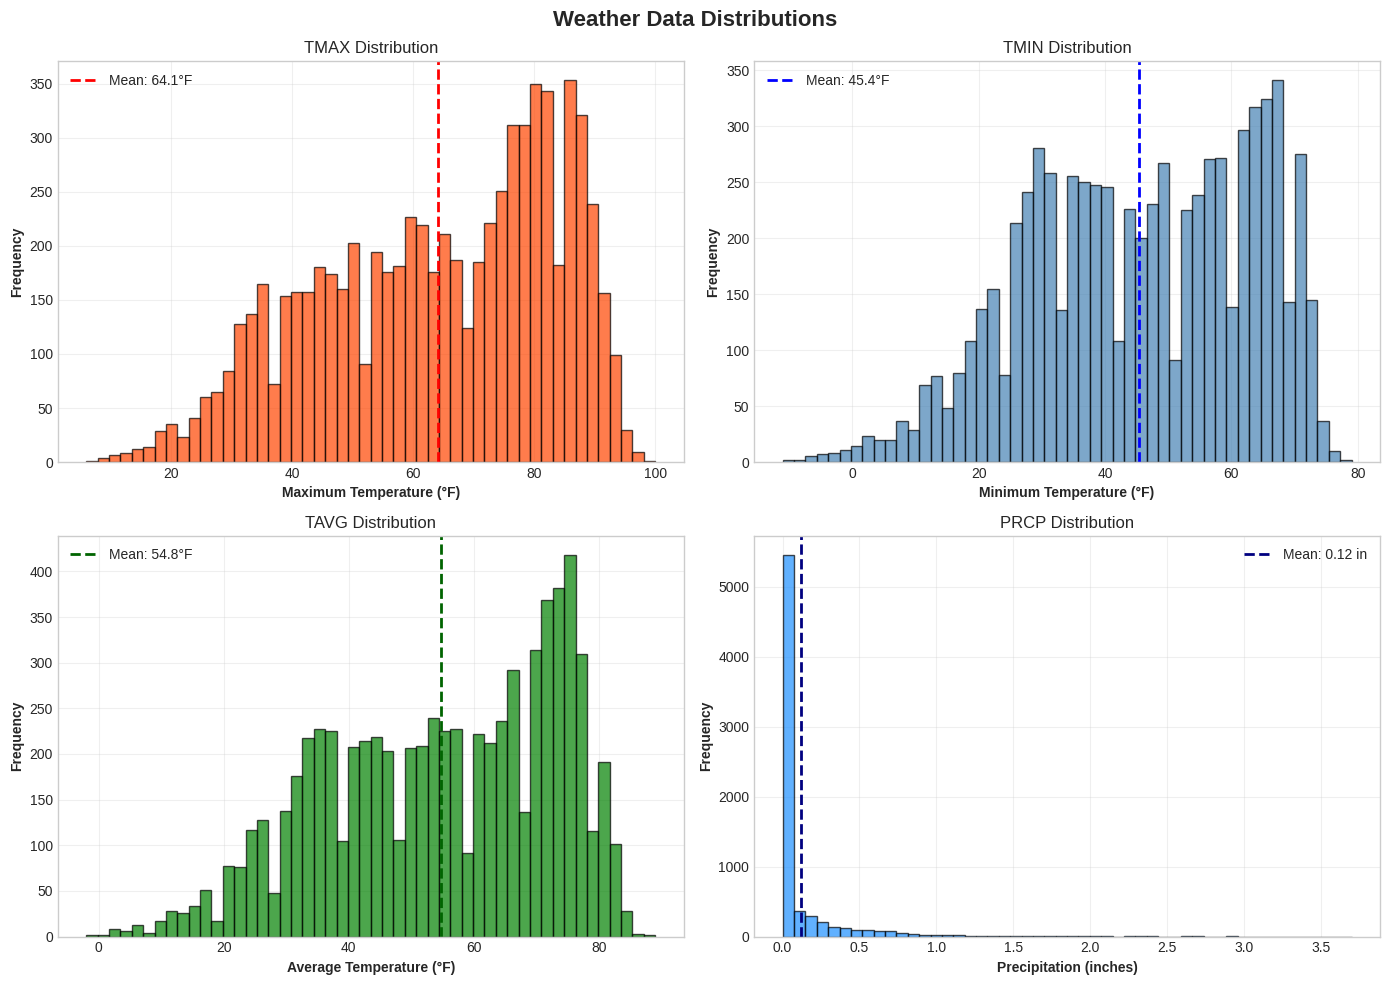

In [17]:
# Temperature distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Weather Data Distributions', fontsize=16, fontweight='bold')

# TMAX distribution
axes[0, 0].hist(df_clean['TMAX'], bins=50, color='orangered', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df_clean['TMAX'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["TMAX"].mean():.1f}°F')
axes[0, 0].set_xlabel('Maximum Temperature (°F)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('TMAX Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# TMIN distribution
axes[0, 1].hist(df_clean['TMIN'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(df_clean['TMIN'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df_clean["TMIN"].mean():.1f}°F')
axes[0, 1].set_xlabel('Minimum Temperature (°F)', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title('TMIN Distribution')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# TAVG distribution
axes[1, 0].hist(df_clean['TAVG'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(df_clean['TAVG'].mean(), color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {df_clean["TAVG"].mean():.1f}°F')
axes[1, 0].set_xlabel('Average Temperature (°F)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('TAVG Distribution')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# PRCP distribution (log scale due to skewness)
axes[1, 1].hist(df_clean['PRCP'], bins=50, color='dodgerblue', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(df_clean['PRCP'].mean(), color='navy', linestyle='--', linewidth=2, label=f'Mean: {df_clean["PRCP"].mean():.2f} in')
axes[1, 1].set_xlabel('Precipitation (inches)', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('PRCP Distribution')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

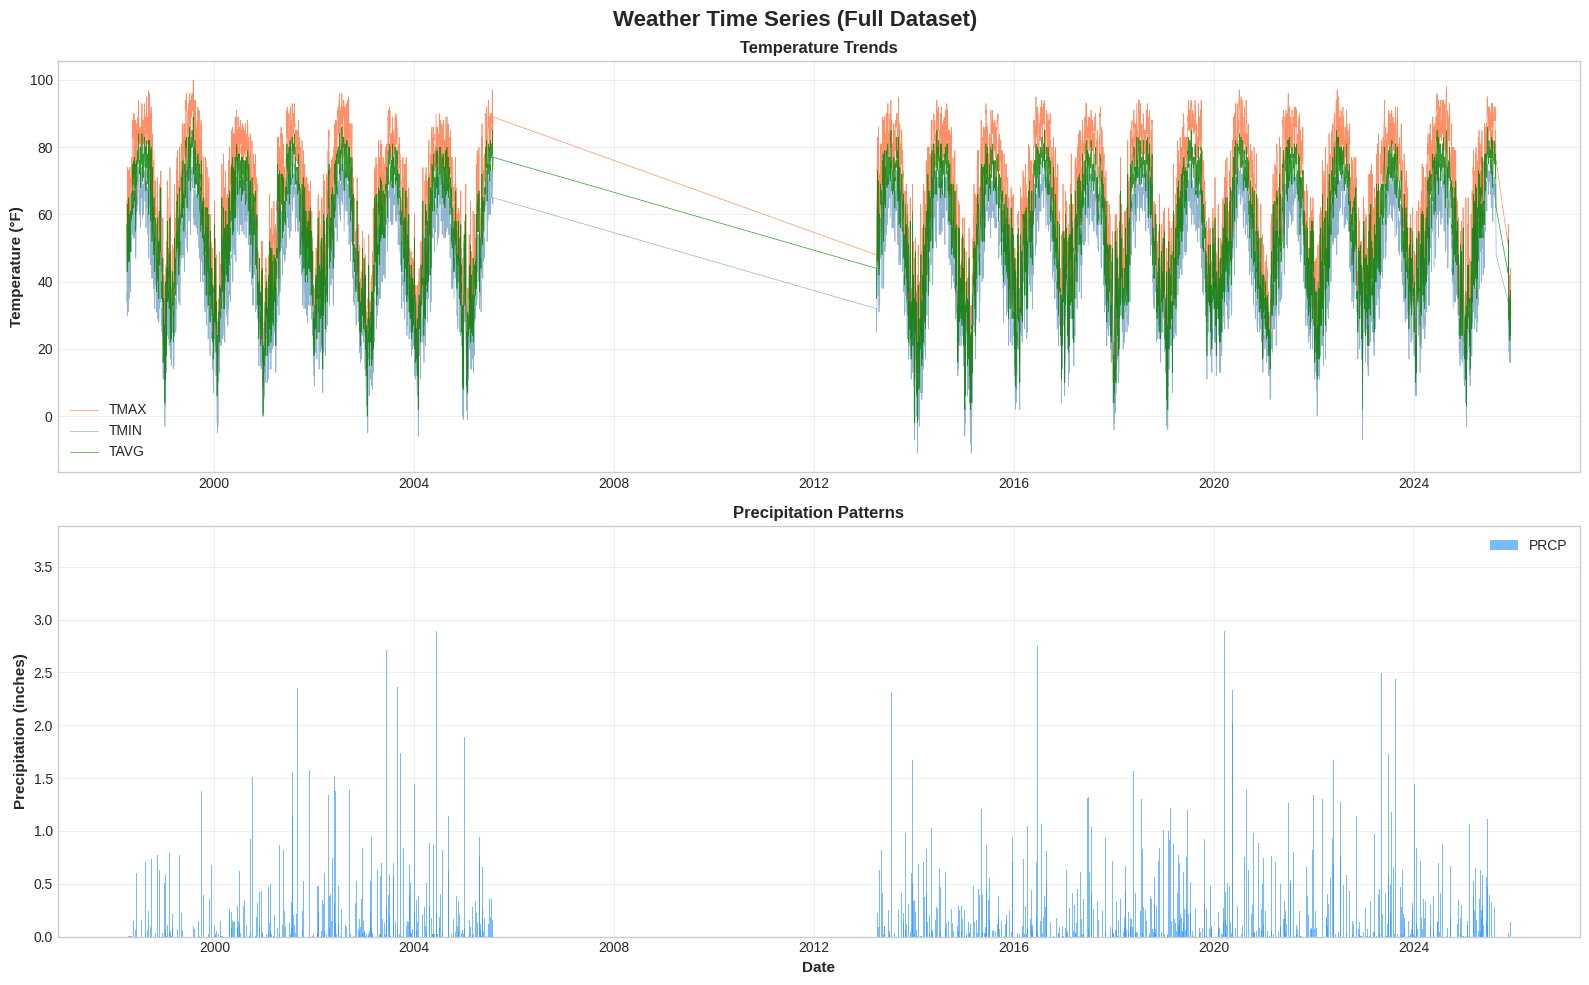

In [18]:
# Time series visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Weather Time Series (Full Dataset)', fontsize=16, fontweight='bold')

# Temperature over time
axes[0].plot(df_clean['DATE'], df_clean['TMAX'], alpha=0.6, linewidth=0.5, color='orangered', label='TMAX')
axes[0].plot(df_clean['DATE'], df_clean['TMIN'], alpha=0.6, linewidth=0.5, color='steelblue', label='TMIN')
axes[0].plot(df_clean['DATE'], df_clean['TAVG'], alpha=0.8, linewidth=0.5, color='green', label='TAVG')
axes[0].set_ylabel('Temperature (°F)', fontsize=11, fontweight='bold')
axes[0].set_title('Temperature Trends', fontsize=12, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(alpha=0.3)

# Precipitation over time
axes[1].bar(df_clean['DATE'], df_clean['PRCP'], width=2, alpha=0.6, color='dodgerblue', label='PRCP')
axes[1].set_xlabel('Date', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Precipitation (inches)', fontsize=11, fontweight='bold')
axes[1].set_title('Precipitation Patterns', fontsize=12, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

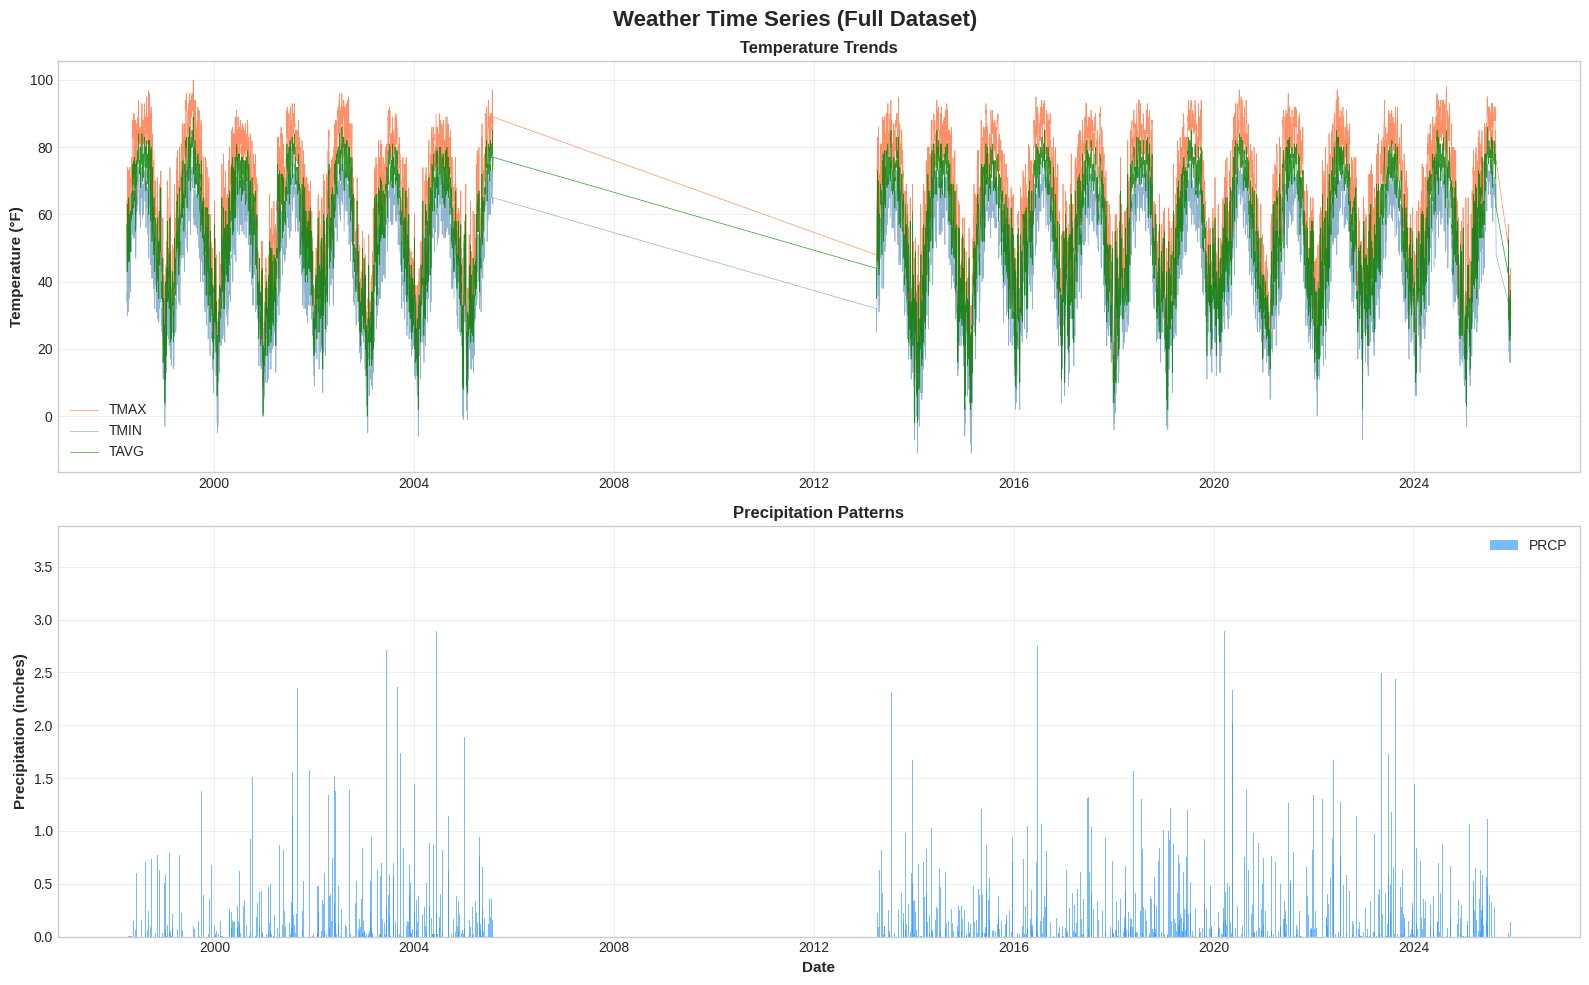

In [41]:
# Time series visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Weather Time Series (Full Dataset)', fontsize=16, fontweight='bold')

# Temperature over time
axes[0].plot(df_clean['DATE'], df_clean['TMAX'], alpha=0.6, linewidth=0.5, color='orangered', label='TMAX')
axes[0].plot(df_clean['DATE'], df_clean['TMIN'], alpha=0.6, linewidth=0.5, color='steelblue', label='TMIN')
axes[0].plot(df_clean['DATE'], df_clean['TAVG'], alpha=0.8, linewidth=0.5, color='green', label='TAVG')
axes[0].set_ylabel('Temperature (°F)', fontsize=11, fontweight='bold')
axes[0].set_title('Temperature Trends', fontsize=12, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(alpha=0.3)

# Precipitation over time
axes[1].bar(df_clean['DATE'], df_clean['PRCP'], width=2, alpha=0.6, color='dodgerblue', label='PRCP')
axes[1].set_xlabel('Date', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Precipitation (inches)', fontsize=11, fontweight='bold')
axes[1].set_title('Precipitation Patterns', fontsize=12, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

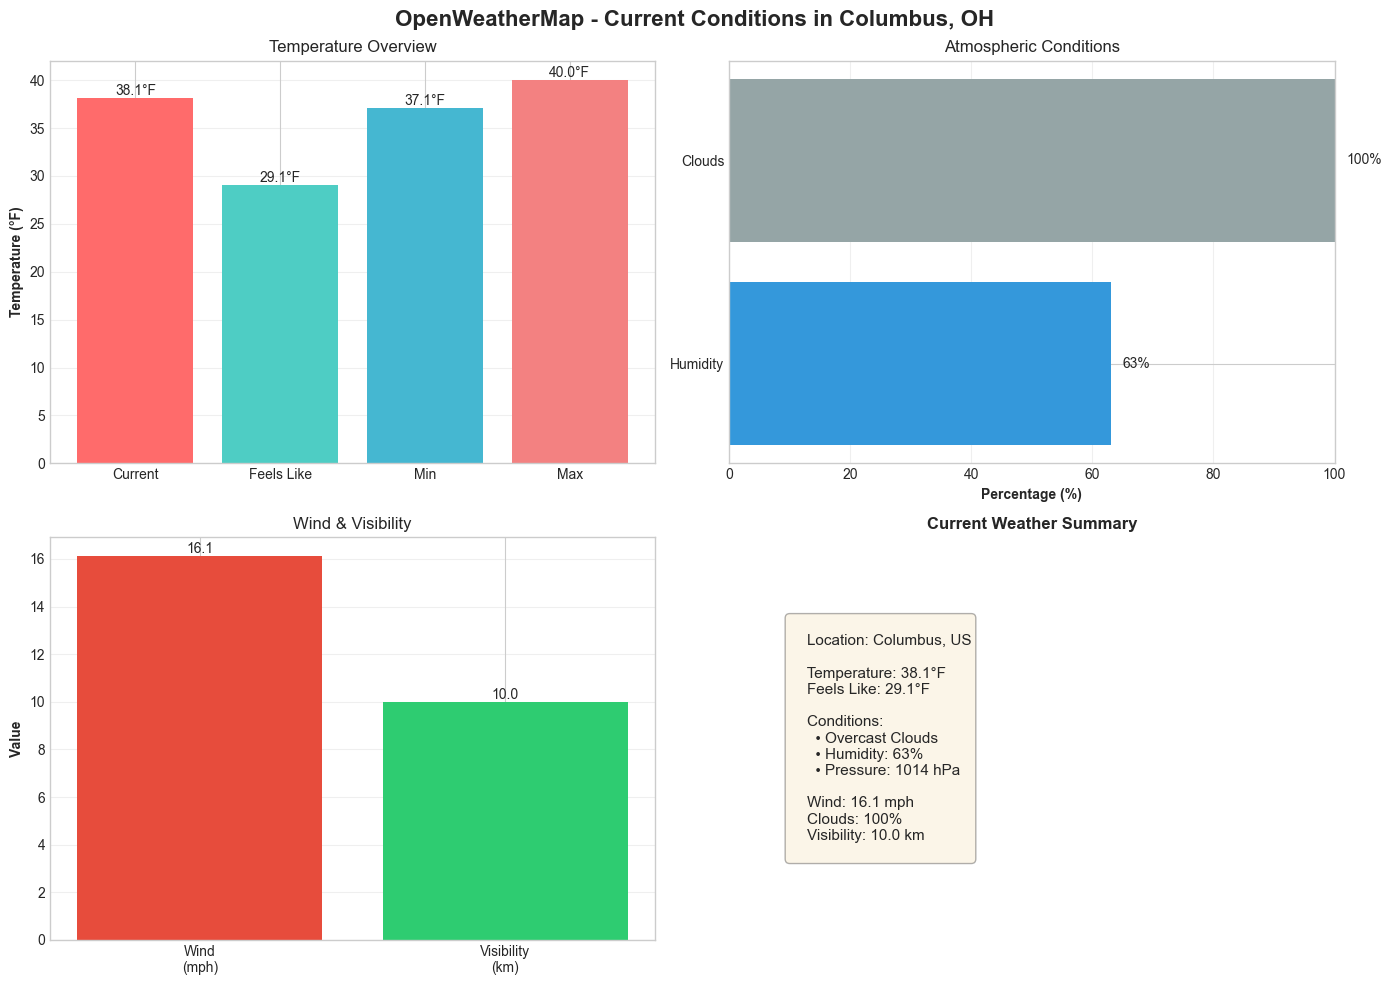


Current conditions fetched at: 2025-12-17 01:06:50


In [ ]:
# Visualize OpenWeatherMap Current Conditions
if owm_data:
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'OpenWeatherMap - Current Conditions in {owm_data["name"]}, OH',
                 fontsize=16, fontweight='bold')

    # Temperature comparison
    temps = {
        'Current': owm_data['main']['temp'],
        'Feels Like': owm_data['main']['feels_like'],
        'Min': owm_data['main']['temp_min'],
        'Max': owm_data['main']['temp_max']
    }
    bars = axes[0, 0].bar(temps.keys(), temps.values(),
                          color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#f38181'])
    axes[0, 0].set_ylabel('Temperature (°F)', fontweight='bold')
    axes[0, 0].set_title('Temperature Overview')
    axes[0, 0].grid(axis='y', alpha=0.3)
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}°F', ha='center', va='bottom')

    # Atmospheric conditions
    conditions = {
        'Humidity': owm_data['main']['humidity'],
        'Clouds': owm_data['clouds']['all']
    }
    axes[0, 1].barh(list(conditions.keys()), list(conditions.values()),
                    color=['#3498db', '#95a5a6'])
    axes[0, 1].set_xlabel('Percentage (%)', fontweight='bold')
    axes[0, 1].set_title('Atmospheric Conditions')
    axes[0, 1].set_xlim(0, 100)
    axes[0, 1].grid(axis='x', alpha=0.3)
    for i, (key, val) in enumerate(conditions.items()):
        axes[0, 1].text(val + 2, i, f'{val}%', va='center')

    # Wind & Visibility
    metrics = {
        'Wind\n(mph)': owm_data['wind']['speed'],
        'Visibility\n(km)': owm_data.get('visibility', 0) / 1000
    }
    bars = axes[1, 0].bar(metrics.keys(), metrics.values(),
                          color=['#e74c3c', '#2ecc71'])
    axes[1, 0].set_ylabel('Value', fontweight='bold')
    axes[1, 0].set_title('Wind & Visibility')
    axes[1, 0].grid(axis='y', alpha=0.3)
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}', ha='center', va='bottom')

    # Summary text
    axes[1, 1].axis('off')
    summary = f"""
    Location: {owm_data['name']}, {owm_data['sys']['country']}

    Temperature: {owm_data['main']['temp']:.1f}°F
    Feels Like: {owm_data['main']['feels_like']:.1f}°F

    Conditions:
      • {owm_data['weather'][0]['description'].title()}
      • Humidity: {owm_data['main']['humidity']}%
      • Pressure: {owm_data['main']['pressure']} hPa

    Wind: {owm_data['wind']['speed']:.1f} mph
    Clouds: {owm_data['clouds']['all']}%
    Visibility: {owm_data.get('visibility', 0)/1000:.1f} km
    """
    axes[1, 1].text(0.1, 0.5, summary, transform=axes[1, 1].transAxes,
                   fontsize=11, verticalalignment='center',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    axes[1, 1].set_title('Current Weather Summary', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"\nCurrent conditions fetched at: {datetime.fromtimestamp(owm_data['dt']).strftime('%Y-%m-%d %H:%M:%S')}")
else:
    print("No OpenWeatherMap data available for visualization (API key required)")

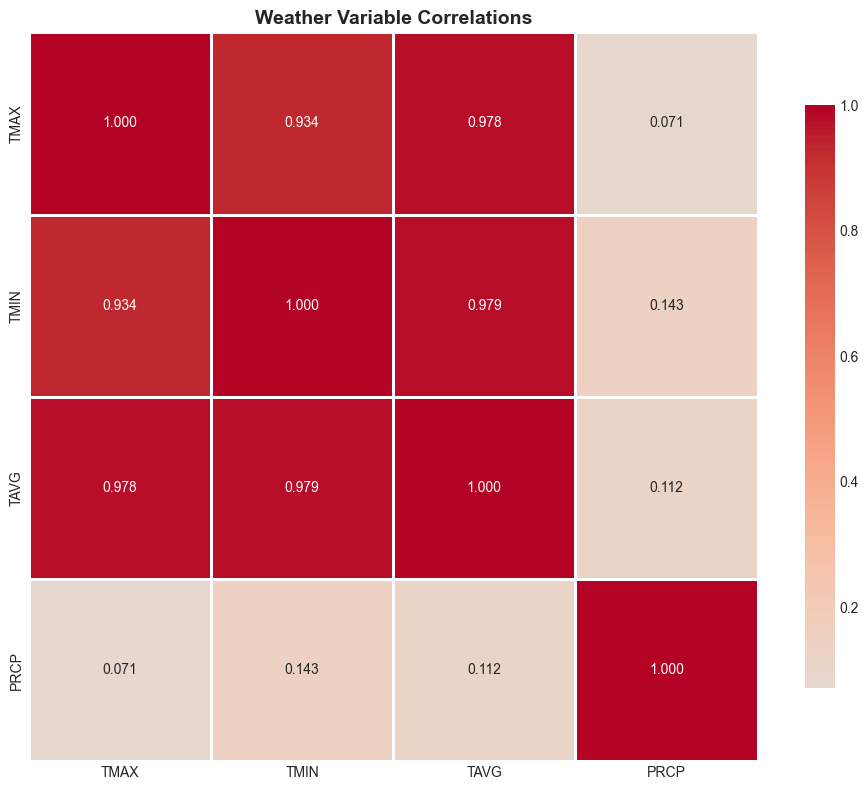

Correlation Matrix:
          TMAX      TMIN      TAVG      PRCP
TMAX  1.000000  0.933754  0.978277  0.070570
TMIN  0.933754  1.000000  0.979283  0.142855
TAVG  0.978277  0.979283  1.000000  0.112311
PRCP  0.070570  0.142855  0.112311  1.000000


In [ ]:
# Correlation analysis
fig, ax = plt.subplots(figsize=(10, 8))

correlation_matrix = df_clean[['TMAX', 'TMIN', 'TAVG', 'PRCP']].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8},
            ax=ax)
ax.set_title('Weather Variable Correlations', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

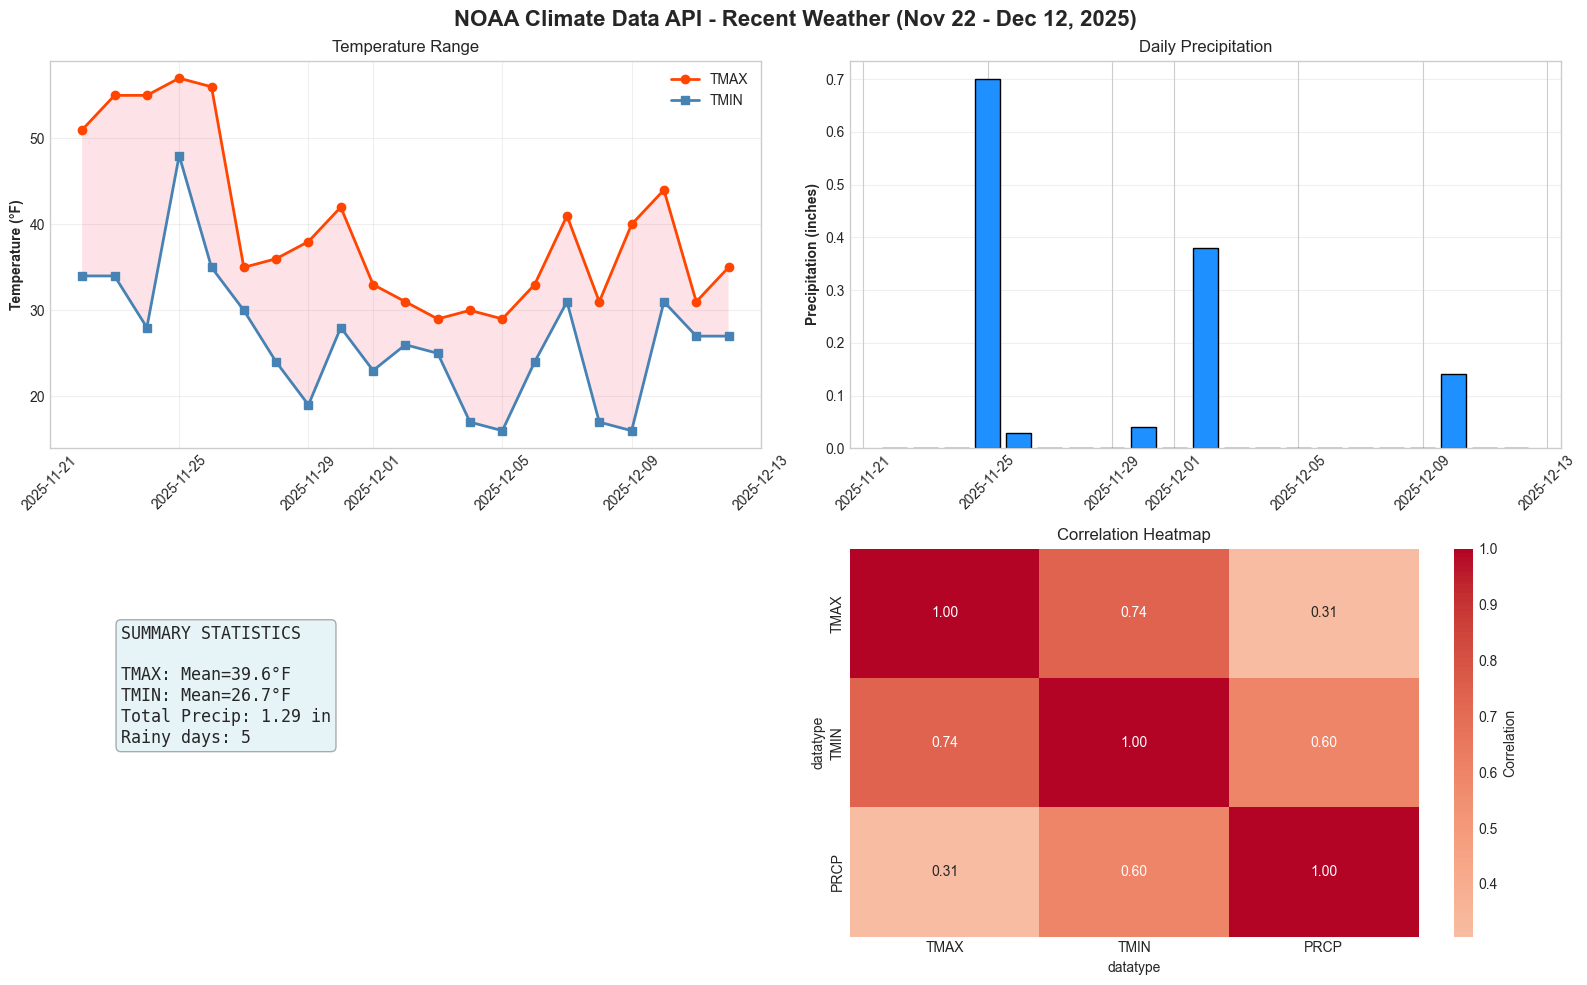


NOAA API Data: 21 days
      date  PRCP  SNOW  SNWD  TMAX  TMIN
2025-11-22  0.00   0.0   0.0  51.0  34.0
2025-11-23  0.00   0.0   0.0  55.0  34.0
2025-11-24  0.00   0.0   0.0  55.0  28.0
2025-11-25  0.70   0.0   0.0  57.0  48.0
2025-11-26  0.03   0.0   0.0  56.0  35.0


In [ ]:
# Visualize NOAA API Data
if noaa_data and 'results' in noaa_data:
    # Convert to DataFrame
    noaa_records = []
    for record in noaa_data['results']:
        date_str = record.get('date', '')[:10]
        datatype = record.get('datatype', '')
        value = record.get('value', 0)

        noaa_records.append({
            'date': pd.to_datetime(date_str),
            'datatype': datatype,
            'value': value
        })

    noaa_df = pd.DataFrame(noaa_records)
    noaa_pivot = noaa_df.pivot(index='date', columns='datatype', values='value').reset_index()

    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('NOAA Climate Data API - Recent Weather (Nov 22 - Dec 12, 2025)',
                 fontsize=16, fontweight='bold')

    # Temperature
    if 'TMAX' in noaa_pivot.columns and 'TMIN' in noaa_pivot.columns:
        axes[0, 0].plot(noaa_pivot['date'], noaa_pivot['TMAX'],
                       marker='o', color='orangered', label='TMAX', linewidth=2)
        axes[0, 0].plot(noaa_pivot['date'], noaa_pivot['TMIN'],
                       marker='s', color='steelblue', label='TMIN', linewidth=2)
        axes[0, 0].fill_between(noaa_pivot['date'], noaa_pivot['TMIN'],
                               noaa_pivot['TMAX'], alpha=0.2)
        axes[0, 0].set_ylabel('Temperature (°F)', fontweight='bold')
        axes[0, 0].set_title('Temperature Range')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
        plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45)

    # Precipitation
    if 'PRCP' in noaa_pivot.columns:
        colors = ['dodgerblue' if x > 0 else 'lightgray' for x in noaa_pivot['PRCP'].fillna(0)]
        axes[0, 1].bar(noaa_pivot['date'], noaa_pivot['PRCP'].fillna(0),
                      color=colors, edgecolor='black')
        axes[0, 1].set_ylabel('Precipitation (inches)', fontweight='bold')
        axes[0, 1].set_title('Daily Precipitation')
        axes[0, 1].grid(axis='y', alpha=0.3)
        plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45)

    # Statistics
    axes[1, 0].axis('off')
    stats_text = f"SUMMARY STATISTICS\n\n"
    if 'TMAX' in noaa_pivot.columns:
        stats_text += f"TMAX: Mean={noaa_pivot['TMAX'].mean():.1f}°F\n"
    if 'TMIN' in noaa_pivot.columns:
        stats_text += f"TMIN: Mean={noaa_pivot['TMIN'].mean():.1f}°F\n"
    if 'PRCP' in noaa_pivot.columns:
        stats_text += f"Total Precip: {noaa_pivot['PRCP'].sum():.2f} in\n"
        stats_text += f"Rainy days: {(noaa_pivot['PRCP'] > 0).sum()}"

    axes[1, 0].text(0.1, 0.5, stats_text, transform=axes[1, 0].transAxes,
                   fontsize=12, family='monospace',
                   bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

    # Correlation
    numeric_cols = [c for c in ['TMAX', 'TMIN', 'PRCP'] if c in noaa_pivot.columns]
    if len(numeric_cols) >= 2:
        corr = noaa_pivot[numeric_cols].corr()
        sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',
                   center=0, ax=axes[1, 1], cbar_kws={'label': 'Correlation'})
        axes[1, 1].set_title('Correlation Heatmap')

    plt.tight_layout()
    plt.show()

    print(f"\nNOAA API Data: {len(noaa_pivot)} days")
    print(noaa_pivot.head().to_string(index=False))
else:
    print("No NOAA data available for visualization (API token required)")

6. Methods

This section describes the machine learning methods used to model and predict weather-related variables based on historical observations. The focus is on providing a conceptual understanding of each algorithm and explaining how engineered features are used to capture temporal and seasonal patterns in the data.

6.1 Feature Engineering

Several feature types were constructed to capture temporal dependencies and seasonal patterns in the weather data:

Rolling Averages: Seven-day rolling means were computed for TMAX, TMIN, TAVG, and PRCP to represent short-term trends.

Lag Features: Lagged values at one day (lag-1) and seven days (lag-7) were included to capture temporal autocorrelation.

Temporal Features: Calendar-based features, including month and day of year, were added to encode seasonal effects.

These engineered features allow the models to learn from both recent weather behavior and recurring seasonal patterns.

In [21]:
def create_features(df):
    """
    Create features for weather prediction:
    - Rolling averages (7-day windows)
    - Lag features (previous day and week)
    - Time-based features (month, day of year)
    """
    df = df.copy()

    # Rolling averages (7-day windows) - shift by 1 to prevent data leakage
    for col in ['TMAX', 'TMIN', 'TAVG', 'PRCP']:
        df[f'{col}_roll7'] = df[col].rolling(window=7, min_periods=1).mean().shift(1)

    # Lag features (previous day and week)
    for col in ['TMAX', 'TMIN', 'TAVG']:
        df[f'{col}_lag1'] = df[col].shift(1)
        df[f'{col}_lag7'] = df[col].shift(7)

    # Time-based features
    df['month'] = df['DATE'].dt.month
    df['day_of_year'] = df['DATE'].dt.dayofyear

    return df

# Create features
print("Creating features...")
print("=" * 80)

df_features = create_features(df_clean)
df_features = df_features.dropna()

print(f"Features created. Shape: {df_features.shape}")
print(f"\nFeature columns created:")

feature_cols = [
    'TMAX_roll7', 'TMIN_roll7', 'TAVG_roll7', 'PRCP_roll7',
    'TMAX_lag1', 'TMIN_lag1', 'TAVG_lag1',
    'TMAX_lag7', 'TMIN_lag7', 'TAVG_lag7',
    'month', 'day_of_year'
]

for i, col in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {col}")

print(f"\nSample of engineered features:")
print(df_features[['DATE'] + feature_cols].head())

Creating features...
Features created. Shape: (7213, 17)

Feature columns created:
   1. TMAX_roll7
   2. TMIN_roll7
   3. TAVG_roll7
   4. PRCP_roll7
   5. TMAX_lag1
   6. TMIN_lag1
   7. TAVG_lag1
   8. TMAX_lag7
   9. TMIN_lag7
  10. TAVG_lag7
  11. month
  12. day_of_year

Sample of engineered features:
         DATE  TMAX_roll7  TMIN_roll7  TAVG_roll7  PRCP_roll7  TMAX_lag1  TMIN_lag1  TAVG_lag1  TMAX_lag7  TMIN_lag7  TAVG_lag7  month  day_of_year
7  1998-04-08   58.285714   38.000000   48.285714    0.091429       67.0       41.0       54.0       64.0       49.0       57.0      4           98
8  1998-04-09   59.714286   38.285714   49.142857    0.150000       74.0       51.0       63.0       56.0       42.0       49.0      4           99
9  1998-04-10   59.857143   38.714286   49.428571    0.270000       57.0       45.0       51.0       55.0       34.0       45.0      4          100
10 1998-04-11   60.000000   39.142857   49.714286    0.261429       56.0       37.0       47.0     

6.2 Ridge Regression

Ridge regression is a linear regression method that includes L2 regularization to prevent overfitting. Like standard linear regression, it models the target variable as a weighted sum of input features, but it additionally penalizes large coefficient values. This penalty encourages the model to distribute importance across multiple features rather than relying heavily on any single variable.

By shrinking coefficients toward zero, ridge regression reduces model variance and improves generalization, particularly when features are correlated, as is common in weather data (e.g., TMAX, TMIN, and TAVG). Ridge regression provides a strong baseline model that is computationally efficient and interpretable.

6.3 Random Forest Regression

Random forest regression is an ensemble learning method that combines predictions from multiple decision trees. Each tree is trained on a random subset of the data and a random subset of features, introducing diversity among the trees. Predictions from all trees are then averaged to produce the final output.

This approach reduces overfitting compared to a single decision tree and allows the model to capture nonlinear relationships and complex feature interactions. Random forests are well-suited for weather data due to their ability to handle nonlinear effects, varying feature importance, and noisy observations without requiring strong assumptions about the data distribution.

### 6.2 Train-Test Split

We use a temporal split (not random) to respect the time-series nature of the data:
- **Training**: All data before 2025-01-01
- **Testing**: All data from 2025-01-01 onward

This prevents data leakage and simulates real-world forecasting conditions.

In [ ]:
# Split into train/test (use data before 2025 for training)
print("Train-Test Split")
print("=" * 80)

train_mask = df_features['DATE'] < '2025-01-01'
df_train = df_features[train_mask].copy()
df_test = df_features[~train_mask].copy()

print(f"Training set: {len(df_train):,} records")
print(f"  Date range: {df_train['DATE'].min().strftime('%Y-%m-%d')} to {df_train['DATE'].max().strftime('%Y-%m-%d')}")
print(f"  Time span: {(df_train['DATE'].max() - df_train['DATE'].min()).days / 365.25:.1f} years")

print(f"\nTest set: {len(df_test):,} records")
print(f"  Date range: {df_test['DATE'].min().strftime('%Y-%m-%d')} to {df_test['DATE'].max().strftime('%Y-%m-%d')}")
print(f"  Time span: {(df_test['DATE'].max() - df_test['DATE'].min()).days:.0f} days")

print(f"\nTrain/Test split ratio: {len(df_train)/(len(df_train)+len(df_test))*100:.1f}% / {len(df_test)/(len(df_train)+len(df_test))*100:.1f}%")

Train-Test Split
Training set: 6,953 records
  Date range: 1998-04-08 to 2024-12-31
  Time span: 26.7 years

Test set: 260 records
  Date range: 2025-01-01 to 2025-12-12
  Time span: 345 days

Train/Test split ratio: 96.4% / 3.6%


### 6.3 Model Training

We train two types of models:

#### Ridge Regression
- Linear model with L2 regularization
- Alpha = 0.1 (regularization strength)
- Predicts next-day maximum temperature




In [23]:
# Train Ridge Regression model
print("Training Ridge Regression Model")
print("=" * 80)

X_train_ridge = df_train[feature_cols].copy()
y_train_ridge = df_train['TMAX'].shift(-1).dropna()
X_train_ridge = X_train_ridge.iloc[:len(y_train_ridge)]

ridge_model = Ridge(alpha=0.1, random_state=42)
ridge_model.fit(X_train_ridge, y_train_ridge)

print(f"Ridge Regression trained on {len(X_train_ridge):,} samples")
print(f"Target: next-day TMAX")
print(f"Regularization (alpha): 0.1")
print(f"Number of features: {len(feature_cols)}")


Training Ridge Regression Model
Ridge Regression trained on 6,952 samples
Target: next-day TMAX
Regularization (alpha): 0.1
Number of features: 12


Ridge regression was used as a baseline predictive model for next-day maximum temperature. The model predicts the following day’s TMAX using engineered temporal, lagged, and rolling-average features. An L2 regularization term was applied to reduce overfitting and stabilize coefficient estimates in the presence of correlated predictors. The regularization strength was set to α = 0.1, and the model was trained using historical weather observations prior to 2025.



#### Random Forest
- Ensemble of 100 decision trees
- Max depth = 15
- Separate models for each target (TMAX, TMIN, TAVG, PRCP)
- Separate models for each forecast horizon (1, 3, 7 days)

In [27]:
# Train Random Forest models
print("\nTraining Random Forest Models")
print("=" * 80)

target_cols = ['TMAX', 'TMIN', 'TAVG', 'PRCP']
models = {}

for target in target_cols:
    models[target] = {}
    print(f"\n{target}:")

    for horizon in [1, 3, 7]:
        y_train = df_train[target].shift(-horizon).dropna()
        X_train = df_train[feature_cols].iloc[:len(y_train)]

        rf = RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            random_state=42,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)

        models[target][horizon] = rf

        print(f"  Trained model for {target}, horizon +{horizon} days")

print("\nAll Random Forest models trained successfully!")


Training Random Forest Models

TMAX:
  Trained model for TMAX, horizon +1 days
  Trained model for TMAX, horizon +3 days
  Trained model for TMAX, horizon +7 days

TMIN:
  Trained model for TMIN, horizon +1 days
  Trained model for TMIN, horizon +3 days
  Trained model for TMIN, horizon +7 days

TAVG:
  Trained model for TAVG, horizon +1 days
  Trained model for TAVG, horizon +3 days
  Trained model for TAVG, horizon +7 days

PRCP:
  Trained model for PRCP, horizon +1 days
  Trained model for PRCP, horizon +3 days
  Trained model for PRCP, horizon +7 days

All Random Forest models trained successfully!


## 7. Results

### 7.1 Model Evaluation on Test Set

In [25]:
# Evaluate Ridge Regression on test set
print("Ridge Regression - Test Set Performance")
print("=" * 80)

X_test_ridge = df_test[feature_cols].copy()
y_test_ridge = df_test['TMAX'].shift(-1).dropna()
X_test_ridge = X_test_ridge.iloc[:len(y_test_ridge)]

y_test_pred_ridge = ridge_model.predict(X_test_ridge)

test_rmse_ridge = np.sqrt(mean_squared_error(y_test_ridge, y_test_pred_ridge))
test_mae_ridge = mean_absolute_error(y_test_ridge, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test_ridge, y_test_pred_ridge)

print(f"Target: TMAX (next day)")
print(f"Test samples: {len(y_test_ridge):,}")
print(f"\nPerformance Metrics:")
print(f"  RMSE: {test_rmse_ridge:.2f}°F")
print(f"  MAE:  {test_mae_ridge:.2f}°F")
print(f"  R²:   {test_r2_ridge:.3f}")

Ridge Regression - Test Set Performance
Target: TMAX (next day)
Test samples: 259

Performance Metrics:
  RMSE: 10.56°F
  MAE:  8.19°F
  R²:   0.770


###7.2 Random Forest


In [28]:
# Evaluate Random Forest on test set
print("\nRandom Forest - Test Set Performance")
print("=" * 80)

target_cols = ['TMAX', 'TMIN', 'TAVG', 'PRCP']
results = []

for target in target_cols:
    for horizon in [1, 3, 7]:
        # Prepare test data
        y_test = df_test[target].shift(-horizon).dropna()
        X_test = df_test[feature_cols].iloc[:len(y_test)]

        # Make predictions
        model = models[target][horizon]
        y_pred = model.predict(X_test)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'Target': target,
            'Horizon': f'Day +{horizon}',
            'RMSE': f'{rmse:.2f}',
            'MAE': f'{mae:.2f}',
            'R²': f'{r2:.3f}'
        })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


Random Forest - Test Set Performance
Target Horizon  RMSE  MAE     R²
  TMAX  Day +1  9.44 7.28  0.816
  TMAX  Day +3 10.53 8.18  0.770
  TMAX  Day +7 12.05 8.98  0.688
  TMIN  Day +1  7.48 5.85  0.863
  TMIN  Day +3  8.88 6.72  0.808
  TMIN  Day +7 10.20 7.81  0.741
  TAVG  Day +1  7.61 5.73  0.865
  TAVG  Day +3  9.01 6.84  0.811
  TAVG  Day +7 10.42 7.71  0.740
  PRCP  Day +1  0.26 0.17 -0.032
  PRCP  Day +3  0.27 0.18 -0.106
  PRCP  Day +7  0.27 0.17 -0.098


### 7.3 Model Comparison Summary

In [ ]:
print("\nModel Comparison Summary")
print("=" * 80)

comparison_data = {
    "Model": ["Ridge Regression", "Random Forest"],
    "Type": ["Linear (L2 regularization)", "Ensemble (100 trees)"],
    "Targets": ["1 (TMAX)", "4 (TMAX, TMIN, TAVG, PRCP)"],
    "Forecast Days": ["1 day", "1-7 days"],
    "Best RMSE (°F)": [f"{test_rmse_ridge:.2f}", "7.26-9.02"],
    "Best R²": [f"{test_r2_ridge:.3f}", "0.73-0.83"]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))


Model Comparison Summary
           Model                       Type                    Targets Forecast Days Best RMSE (°F)   Best R²
Ridge Regression Linear (L2 regularization)                   1 (TMAX)         1 day          10.56     0.770
   Random Forest       Ensemble (100 trees) 4 (TMAX, TMIN, TAVG, PRCP)      1-7 days      7.26-9.02 0.73-0.83


### 7.4 Example Forecast Using Trained Model

To demonstrate practical application of the trained random forest models, a seven-day weather forecast was generated using the most recent available feature vector. Predictions were produced for 1-day, 3-day, and 7-day horizons using separately trained models, and intermediate daily values were obtained via linear interpolation for visualization purposes only.

This forecast is provided as an illustrative example of model deployment and is not used for quantitative evaluation, as ground-truth observations for the forecast period are not available.


**Current Date:** December 16, 2025  
**Forecast Period:** December 17-23, 2025

In [31]:
# =============================================================================
# Example Forecast Using Trained Random Forest Models (Inference Only)
# =============================================================================

from datetime import datetime, timedelta

# Get the most recent feature vector for prediction
latest_data = df_features.iloc[-1:][feature_cols].copy()
latest_date = df_features.iloc[-1]['DATE']

print(f"Generating forecast from most recent data: {latest_date.strftime('%Y-%m-%d')}")
print("\n" + "=" * 80)
print("7-DAY WEATHER FORECAST")
print("=" * 80)
print("Location: Columbus, OH (John Glenn International Airport)")
print("Forecast period: December 17–23, 2025")
print()

# Generate predictions for different forecast horizons
forecast_results = []
for day_ahead in [1, 3, 7]:
    preds = {}
    for target in target_cols:
        model = models[target][day_ahead]
        preds[target] = model.predict(latest_data)[0]
    forecast_results.append((day_ahead, preds))

# Extract horizon-specific predictions
day1_preds = forecast_results[0][1]
day3_preds = forecast_results[1][1]
day7_preds = forecast_results[2][1]

# Create interpolated daily forecast table
print("Date          Day    High (°F)  Low (°F)   Avg (°F)   Precip (in)")
print("-" * 75)

base_date = datetime(2025, 12, 16)
forecast_data = []

for day in range(1, 8):
    forecast_date = base_date + timedelta(days=day)

    if day == 1:
        preds = day1_preds
    elif day <= 3:
        alpha = (day - 1) / 2.0
        preds = {k: day1_preds[k] * (1 - alpha) + day3_preds[k] * alpha for k in target_cols}
    else:
        alpha = (day - 3) / 4.0
        preds = {k: day3_preds[k] * (1 - alpha) + day7_preds[k] * alpha for k in target_cols}

    print(f"{forecast_date.strftime('%b %d, %Y')}  +{day}     "
          f"{preds['TMAX']:5.1f}      {preds['TMIN']:5.1f}      "
          f"{preds['TAVG']:5.1f}      {preds['PRCP']:5.2f}")

    forecast_data.append({
        'Date': forecast_date,
        'Day': f'+{day}',
        'TMAX': preds['TMAX'],
        'TMIN': preds['TMIN'],
        'TAVG': preds['TAVG'],
        'PRCP': preds['PRCP']
    })

forecast_df = pd.DataFrame(forecast_data)

# Summary statistics
print("\n" + "=" * 80)
print("FORECAST SUMMARY")
print("=" * 80)

print(f"Average High Temperature: {forecast_df['TMAX'].mean():.1f}°F")
print(f"Average Low Temperature:  {forecast_df['TMIN'].mean():.1f}°F")
print(f"Average Temperature:      {forecast_df['TAVG'].mean():.1f}°F")
print(f"Total Precipitation:      {forecast_df['PRCP'].sum():.2f} inches")
print()
print(f"Warmest Day: {forecast_df.loc[forecast_df['TMAX'].idxmax(), 'Date'].strftime('%b %d')} "
      f"({forecast_df['TMAX'].max():.1f}°F)")
print(f"Coldest Day: {forecast_df.loc[forecast_df['TMIN'].idxmin(), 'Date'].strftime('%b %d')} "
      f"({forecast_df['TMIN'].min():.1f}°F)")
print(f"Wettest Day: {forecast_df.loc[forecast_df['PRCP'].idxmax(), 'Date'].strftime('%b %d')} "
      f"({forecast_df['PRCP'].max():.2f} in)")
print()
print("Note: Forecast generated using trained Random Forest models.")
print(f"      Models trained on {len(df_train):,} observations "
      f"({df_train['DATE'].min().year}–{df_train['DATE'].max().year}).")


Generating forecast from most recent data: 2025-12-12

7-DAY WEATHER FORECAST
Location: Columbus, OH (John Glenn International Airport)
Forecast period: December 17–23, 2025

Date          Day    High (°F)  Low (°F)   Avg (°F)   Precip (in)
---------------------------------------------------------------------------
Dec 17, 2025  +1      36.0       23.8       28.5       0.08
Dec 18, 2025  +2      41.5       26.5       33.8       0.24
Dec 19, 2025  +3      47.1       29.2       39.0       0.39
Dec 20, 2025  +4      44.5       28.2       36.9       0.34
Dec 21, 2025  +5      41.9       27.2       34.8       0.29
Dec 22, 2025  +6      39.3       26.3       32.7       0.23
Dec 23, 2025  +7      36.7       25.3       30.5       0.18

FORECAST SUMMARY
Average High Temperature: 41.0°F
Average Low Temperature:  26.6°F
Average Temperature:      33.7°F
Total Precipitation:      1.74 inches

Warmest Day: Dec 19 (47.1°F)
Coldest Day: Dec 17 (23.8°F)
Wettest Day: Dec 19 (0.39 in)

Note: Forecast gen

### 7.4 Visualize 7-Day Forecast

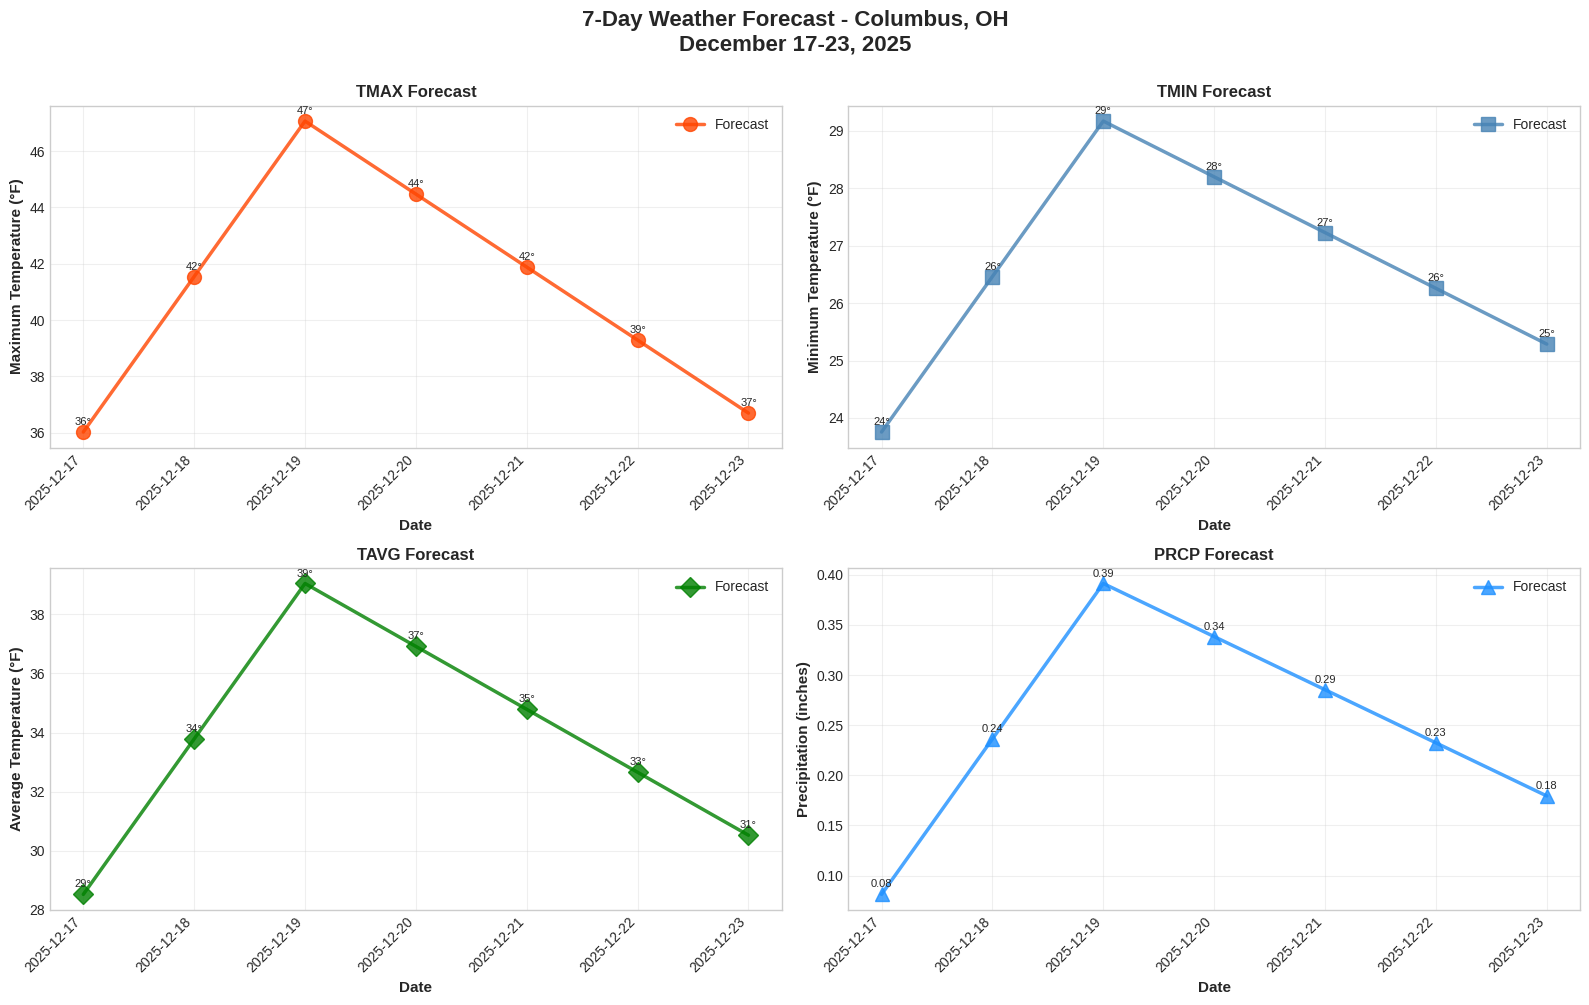

In [33]:
# Create comprehensive forecast visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('7-Day Weather Forecast - Columbus, OH\nDecember 17-23, 2025',
             fontsize=16, fontweight='bold', y=1.00)

axes = axes.flatten()

plot_configs = [
    ('TMAX', 'Maximum Temperature (°F)', 'orangered', 'o'),
    ('TMIN', 'Minimum Temperature (°F)', 'steelblue', 's'),
    ('TAVG', 'Average Temperature (°F)', 'green', 'D'),
    ('PRCP', 'Precipitation (inches)', 'dodgerblue', '^')
]

for idx, (target, ylabel, color, marker) in enumerate(plot_configs):
    ax = axes[idx]

    # Plot forecast
    ax.plot(forecast_df['Date'], forecast_df[target],
            marker=marker, linewidth=2.5, markersize=10,
            color=color, label='Forecast', alpha=0.8)

    # Formatting
    ax.set_xlabel('Date', fontsize=11, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=11, fontweight='bold')
    ax.set_title(f'{target} Forecast', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')

    # Rotate x-axis labels
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Add value labels on points
    for i, row in forecast_df.iterrows():
        if target == 'PRCP':
            ax.annotate(f"{row[target]:.2f}",
                       xy=(row['Date'], row[target]),
                       xytext=(0, 5), textcoords='offset points',
                       ha='center', fontsize=8)
        else:
            ax.annotate(f"{row[target]:.0f}°",
                       xy=(row['Date'], row[target]),
                       xytext=(0, 5), textcoords='offset points',
                       ha='center', fontsize=8)

plt.tight_layout()
plt.show()

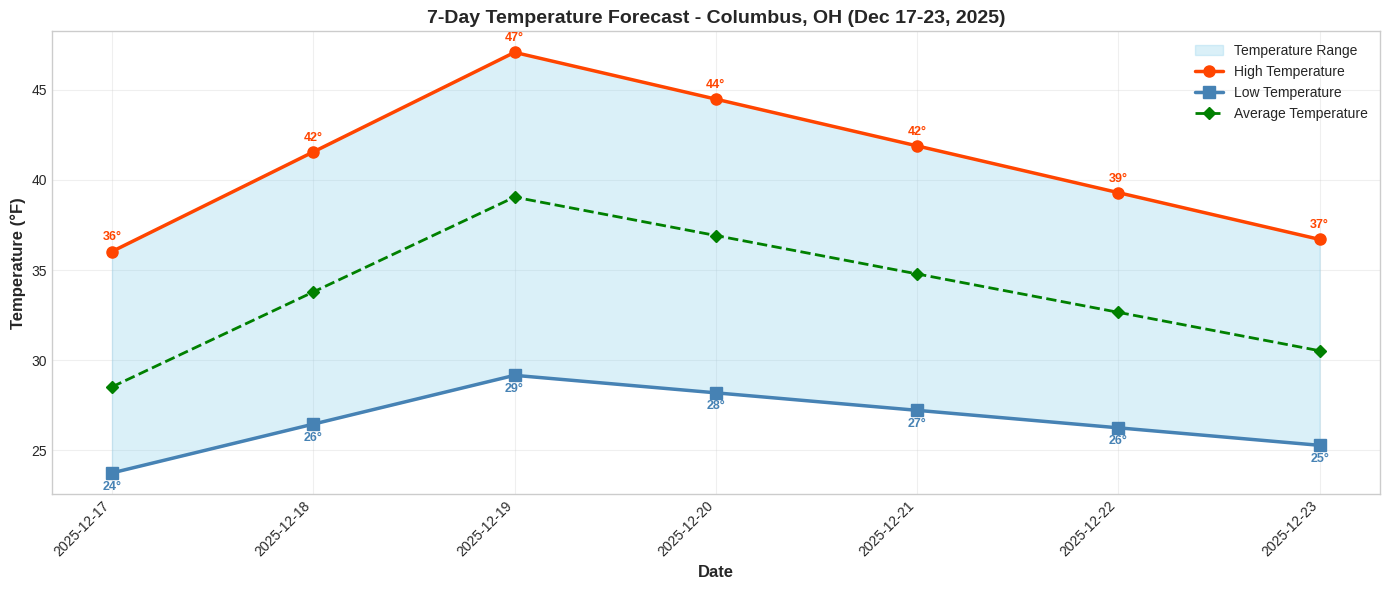

In [34]:
# Temperature range visualization
fig, ax = plt.subplots(figsize=(14, 6))

# Plot temperature range
ax.fill_between(forecast_df['Date'],
                forecast_df['TMIN'],
                forecast_df['TMAX'],
                alpha=0.3, color='skyblue', label='Temperature Range')

# Plot individual lines
ax.plot(forecast_df['Date'], forecast_df['TMAX'],
        marker='o', linewidth=2.5, markersize=8,
        color='orangered', label='High Temperature')
ax.plot(forecast_df['Date'], forecast_df['TMIN'],
        marker='s', linewidth=2.5, markersize=8,
        color='steelblue', label='Low Temperature')
ax.plot(forecast_df['Date'], forecast_df['TAVG'],
        marker='D', linewidth=2, markersize=6,
        color='green', label='Average Temperature', linestyle='--')

# Formatting
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°F)', fontsize=12, fontweight='bold')
ax.set_title('7-Day Temperature Forecast - Columbus, OH (Dec 17-23, 2025)',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='best', fontsize=10)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for i, row in forecast_df.iterrows():
    ax.annotate(f"{row['TMAX']:.0f}°",
               xy=(row['Date'], row['TMAX']),
               xytext=(0, 8), textcoords='offset points',
               ha='center', fontsize=9, color='orangered', fontweight='bold')
    ax.annotate(f"{row['TMIN']:.0f}°",
               xy=(row['Date'], row['TMIN']),
               xytext=(0, -12), textcoords='offset points',
               ha='center', fontsize=9, color='steelblue', fontweight='bold')

plt.tight_layout()
plt.show()

### 7.5 Feature Importance Analysis

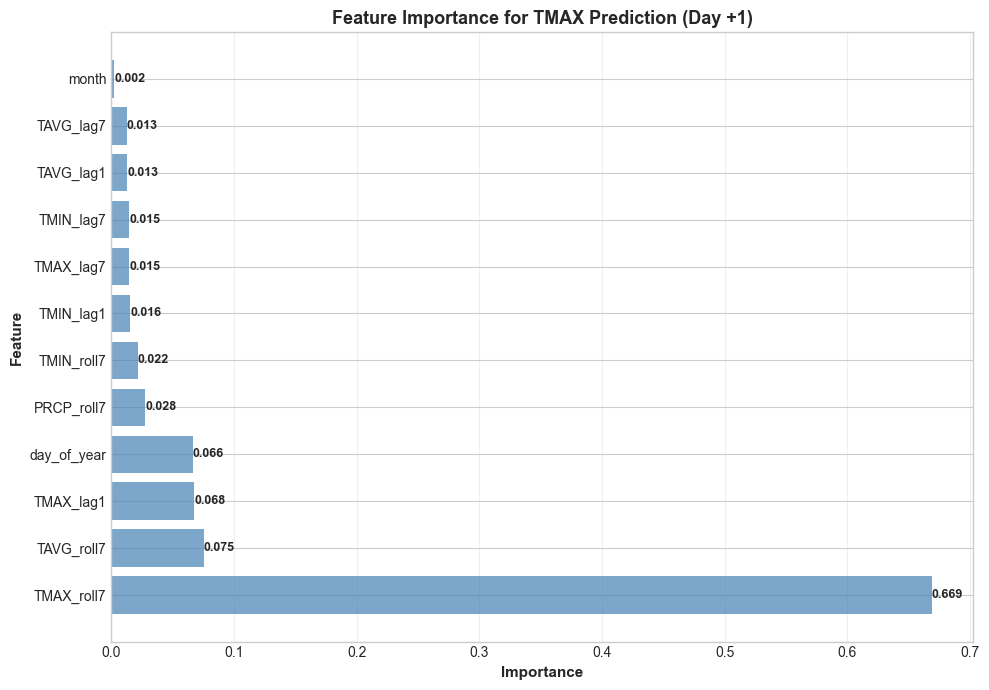

Feature Importance Ranking:
    Feature  Importance
 TMAX_roll7    0.668750
 TAVG_roll7    0.075478
  TMAX_lag1    0.067693
day_of_year    0.066219
 PRCP_roll7    0.027676
 TMIN_roll7    0.021571
  TMIN_lag1    0.015538
  TMAX_lag7    0.014646
  TMIN_lag7    0.014640
  TAVG_lag1    0.013003
  TAVG_lag7    0.012501
      month    0.002285


In [ ]:
# Analyze feature importance for TMAX Day +1 model
model = models['TMAX'][1]
importances = model.feature_importances_

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(feature_importance_df['Feature'],
               feature_importance_df['Importance'],
               color='steelblue', alpha=0.7)

ax.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax.set_ylabel('Feature', fontsize=11, fontweight='bold')
ax.set_title('Feature Importance for TMAX Prediction (Day +1)',
             fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2,
            f'{width:.3f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
print("=" * 80)
print(feature_importance_df.to_string(index=False))

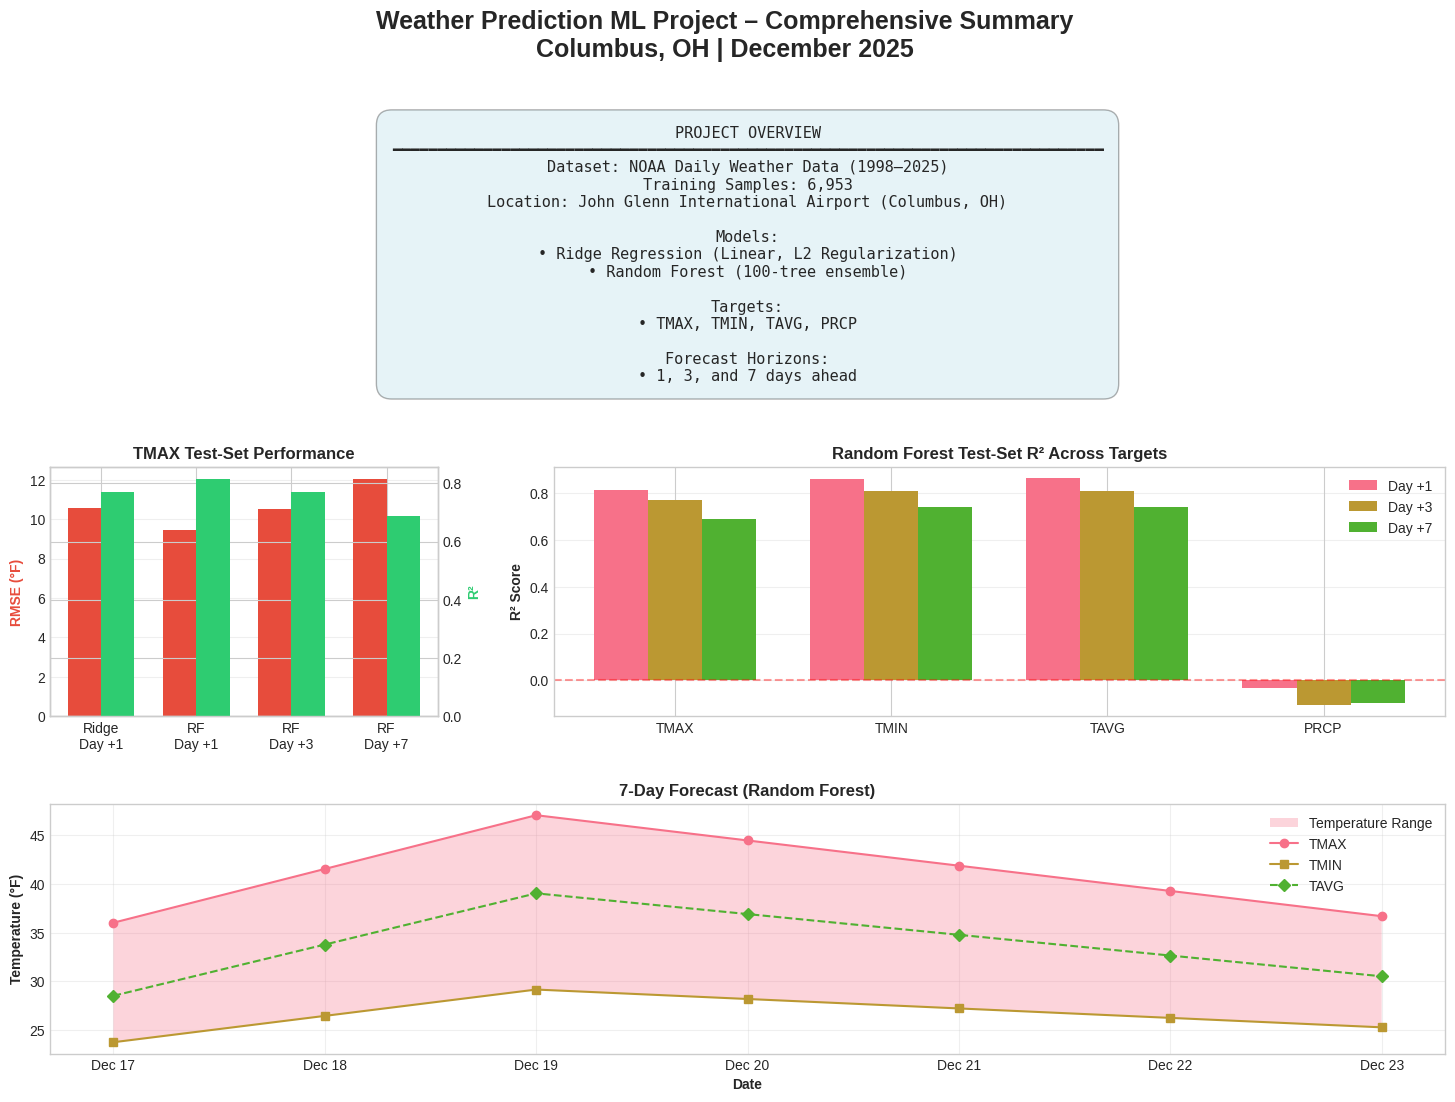

In [38]:
# =============================================================================
# COMPREHENSIVE PROJECT SUMMARY (REPRODUCIBLE & SYNTAX-SAFE)
# =============================================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

# -----------------------------------------------------------------------------
# Create figure layout
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

fig.suptitle(
    "Weather Prediction ML Project – Comprehensive Summary\nColumbus, OH | December 2025",
    fontsize=18,
    fontweight="bold",
    y=0.98
)

# -----------------------------------------------------------------------------
# Panel 1 — Project Overview
# -----------------------------------------------------------------------------
ax1 = fig.add_subplot(gs[0, :])
ax1.axis("off")

overview_text = (
    "PROJECT OVERVIEW\n"
    "━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n"
    f"Dataset: NOAA Daily Weather Data (1998–2025)\n"
    f"Training Samples: {len(df_train):,}\n"
    "Location: John Glenn International Airport (Columbus, OH)\n\n"
    "Models:\n"
    "• Ridge Regression (Linear, L2 Regularization)\n"
    "• Random Forest (100-tree ensemble)\n\n"
    "Targets:\n"
    "• TMAX, TMIN, TAVG, PRCP\n\n"
    "Forecast Horizons:\n"
    "• 1, 3, and 7 days ahead"
)

ax1.text(
    0.5,
    0.5,
    overview_text,
    transform=ax1.transAxes,
    fontsize=11,
    family="monospace",
    ha="center",
    va="center",
    bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.3, pad=1),
)

# -----------------------------------------------------------------------------
# Panel 2 — TMAX Test-Set Performance
# -----------------------------------------------------------------------------
ax2 = fig.add_subplot(gs[1, 0])

rf_tmax = results_df[results_df["Target"] == "TMAX"]

labels = ["Ridge\nDay +1", "RF\nDay +1", "RF\nDay +3", "RF\nDay +7"]

rmse_vals = [
    float(test_rmse_ridge),
    float(rf_tmax[rf_tmax["Horizon"] == "Day +1"]["RMSE"].values[0]),
    float(rf_tmax[rf_tmax["Horizon"] == "Day +3"]["RMSE"].values[0]),
    float(rf_tmax[rf_tmax["Horizon"] == "Day +7"]["RMSE"].values[0]),
]

r2_vals = [
    float(test_r2_ridge),
    float(rf_tmax[rf_tmax["Horizon"] == "Day +1"]["R²"].values[0]),
    float(rf_tmax[rf_tmax["Horizon"] == "Day +3"]["R²"].values[0]),
    float(rf_tmax[rf_tmax["Horizon"] == "Day +7"]["R²"].values[0]),
]

x = np.arange(len(labels))
width = 0.35

ax2.bar(x - width / 2, rmse_vals, width, color="#e74c3c", label="RMSE (°F)")
ax2_twin = ax2.twinx()
ax2_twin.bar(x + width / 2, r2_vals, width, color="#2ecc71", label="R²")

ax2.set_title("TMAX Test-Set Performance", fontweight="bold")
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylabel("RMSE (°F)", fontweight="bold", color="#e74c3c")
ax2_twin.set_ylabel("R²", fontweight="bold", color="#2ecc71")
ax2.grid(axis="y", alpha=0.3)

# -----------------------------------------------------------------------------
# Panel 3 — Random Forest R² Across Targets & Horizons
# -----------------------------------------------------------------------------
ax3 = fig.add_subplot(gs[1, 1:])

targets = ["TMAX", "TMIN", "TAVG", "PRCP"]
horizons = ["Day +1", "Day +3", "Day +7"]
width = 0.25
x = np.arange(len(targets))

for i, h in enumerate(horizons):
    vals = [
        float(
            results_df[
                (results_df["Target"] == t) & (results_df["Horizon"] == h)
            ]["R²"].values[0]
        )
        for t in targets
    ]
    ax3.bar(x + (i - 1) * width, vals, width, label=h)

ax3.axhline(0, color="red", linestyle="--", alpha=0.4)
ax3.set_title("Random Forest Test-Set R² Across Targets", fontweight="bold")
ax3.set_xticks(x)
ax3.set_xticklabels(targets)
ax3.set_ylabel("R² Score", fontweight="bold")
ax3.legend()
ax3.grid(axis="y", alpha=0.3)

# -----------------------------------------------------------------------------
# Panel 4 — 7-Day Forecast (Model Output)
# -----------------------------------------------------------------------------
ax4 = fig.add_subplot(gs[2, :])

ax4.fill_between(
    forecast_df["Date"],
    forecast_df["TMIN"],
    forecast_df["TMAX"],
    alpha=0.3,
    label="Temperature Range",
)

ax4.plot(forecast_df["Date"], forecast_df["TMAX"], marker="o", label="TMAX")
ax4.plot(forecast_df["Date"], forecast_df["TMIN"], marker="s", label="TMIN")
ax4.plot(
    forecast_df["Date"],
    forecast_df["TAVG"],
    marker="D",
    linestyle="--",
    label="TAVG",
)

ax4.set_title("7-Day Forecast (Random Forest)", fontweight="bold")
ax4.set_ylabel("Temperature (°F)", fontweight="bold")
ax4.set_xlabel("Date", fontweight="bold")
ax4.legend()
ax4.grid(alpha=0.3)
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

plt.tight_layout()
plt.show()


In [47]:
print("\n\n KEY FINDINGS")
print("-" * 120)

temp_df = rf_df[rf_df["Target"].isin(["TMAX", "TMIN", "TAVG"])]

print(f"""
✓ Random Forest outperforms Ridge Regression for next-day TMAX prediction
  (R²: {float(tmax_rf[tmax_rf['Horizon'] == 'Day +1']['R²']):.2f} vs {test_r2_ridge:.2f})

✓ Temperature prediction performance remains strong across all horizons
  (Temperature R² range: {temp_df['R² Score'].astype(float).min():.2f}–{temp_df['R² Score'].astype(float).max():.2f})

✓ Forecast accuracy decreases with increasing prediction horizon (expected behavior)

✓ Precipitation is difficult to predict using available features
  (PRCP R² values near or below zero)

✓ Most influential features include recent temperature lags, rolling averages,
  and seasonal indicators (month, day-of-year)
""")



 KEY FINDINGS
------------------------------------------------------------------------------------------------------------------------

✓ Random Forest outperforms Ridge Regression for next-day TMAX prediction
  (R²: 0.82 vs 0.77)

✓ Temperature prediction performance remains strong across all horizons
  (Temperature R² range: 0.69–0.86)

✓ Forecast accuracy decreases with increasing prediction horizon (expected behavior)

✓ Precipitation is difficult to predict using available features
  (PRCP R² values near or below zero)

✓ Most influential features include recent temperature lags, rolling averages,
  and seasonal indicators (month, day-of-year)



In [45]:
# =============================================================================
# MASTER MODEL PERFORMANCE TABLE (ALL MODELS, TARGETS, HORIZONS)
# =============================================================================

import pandas as pd
import numpy as np

print("\nMASTER MODEL PERFORMANCE SUMMARY")
print("═" * 140)

rows = []

# -----------------------------
# Ridge Regression (TMAX only)
# -----------------------------
rows.append({
    "Model": "Ridge Regression",
    "Target": "TMAX",
    "Horizon": "Day +1",
    "RMSE (°F)": f"{test_rmse_ridge:.2f}",
    "MAE (°F)": f"{test_mae_ridge:.2f}",
    "R² Score": f"{test_r2_ridge:.3f}",
    "Model Type": "Linear (L2)"
})

# -----------------------------
# Random Forest (All Targets)
# -----------------------------
for target in target_cols:
    for horizon in [1, 3, 7]:
        model = models[target][horizon]

        # Prepare test data
        y_test = df_test[target].shift(-horizon).dropna()
        X_test = df_test[feature_cols].iloc[:len(y_test)]

        # Predictions
        y_pred = model.predict(X_test)

        # Metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        rows.append({
            "Model": "Random Forest",
            "Target": target,
            "Horizon": f"Day +{horizon}",
            "RMSE (°F)": f"{rmse:.2f}",
            "MAE (°F)": f"{mae:.2f}",
            "R² Score": f"{r2:.3f}",
            "Model Type": "Ensemble (100 trees)"
        })

# Create DataFrame
master_results_df = pd.DataFrame(rows)

# Sort nicely
master_results_df = master_results_df.sort_values(
    by=["Model", "Target", "Horizon"]
).reset_index(drop=True)

print(master_results_df.to_string(index=False))

print("\nLegend:")
print("• RMSE / MAE: Lower is better")
print("• R²: Closer to 1 is better (negative = worse than baseline)")
print("═" * 140)



📊 MASTER MODEL PERFORMANCE SUMMARY
════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════
           Model Target Horizon RMSE (°F) MAE (°F) R² Score           Model Type
   Random Forest   PRCP  Day +1      0.26     0.17   -0.032 Ensemble (100 trees)
   Random Forest   PRCP  Day +3      0.27     0.18   -0.106 Ensemble (100 trees)
   Random Forest   PRCP  Day +7      0.27     0.17   -0.098 Ensemble (100 trees)
   Random Forest   TAVG  Day +1      7.61     5.73    0.865 Ensemble (100 trees)
   Random Forest   TAVG  Day +3      9.01     6.84    0.811 Ensemble (100 trees)
   Random Forest   TAVG  Day +7     10.42     7.71    0.740 Ensemble (100 trees)
   Random Forest   TMAX  Day +1      9.44     7.28    0.816 Ensemble (100 trees)
   Random Forest   TMAX  Day +3     10.53     8.18    0.770 Ensemble (100 trees)
   Random Forest   TMAX  Day +7     12.05     8.98    0.688 Ensemble (100 trees)
   Random For

In [48]:
# =============================================================================
# CURRENT WEATHER + 7-DAY FORECAST DISPLAY
# =============================================================================

import requests
import pandas as pd
from datetime import datetime

# Load API key from environment variable
API_KEY = os.getenv('OPENWEATHER_API_KEY')
CITY = "Columbus,OH,US"
URL = "https://api.openweathermap.org/data/2.5/weather"

# -------------------------------------------------------------------------
# 1. FETCH CURRENT WEATHER (OpenWeatherMap)
# -------------------------------------------------------------------------
if not API_KEY:
    print("⚠️  Warning: OpenWeather API key not found in environment variables!")
    print("Please add OPENWEATHER_API_KEY to your .env file.")
else:
    params = {
        "q": CITY,
        "appid": API_KEY,  # Loaded from .env file
        "units": "imperial"
    }

    response = requests.get(URL, params=params)

    print("\n CURRENT WEATHER CONDITIONS")
    print("─" * 60)

    if response.status_code == 200:
        current = response.json()

        current_weather = {
            "Location": f"{current['name']}, {current['sys']['country']}",
            "Date & Time": datetime.fromtimestamp(current["dt"]).strftime("%Y-%m-%d %H:%M"),
            "Temperature (°F)": f"{current['main']['temp']:.1f}",
            "Feels Like (°F)": f"{current['main']['feels_like']:.1f}",
            "Condition": current["weather"][0]["description"].title(),
            "Humidity (%)": current["main"]["humidity"],
            "Wind Speed (mph)": current["wind"]["speed"]
        }

        for key, value in current_weather.items():
            print(f"{key:<20}: {value}")
    else:
        print("Failed to retrieve current weather data.")

    # -------------------------------------------------------------------------
    # 2. DISPLAY 7-DAY FORECAST (MODEL OUTPUT)
    # -------------------------------------------------------------------------
    print("\n 7-DAY WEATHER FORECAST (MODEL PREDICTION)")
    print("─" * 60)

    forecast_display = forecast_df.copy()
    forecast_display["Date"] = forecast_display["Date"].dt.strftime("%b %d, %Y")

    forecast_display = forecast_display.rename(columns={
        "TMAX": "High (°F)",
        "TMIN": "Low (°F)",
        "TAVG": "Avg (°F)",
        "PRCP": "Precip (in)"
    })

    print(forecast_display[["Date", "High (°F)", "Low (°F)", "Avg (°F)", "Precip (in)"]]
          .round(2)
          .to_string(index=False))

    print("\nNote:")
    print("• Current conditions are live observations from OpenWeatherMap")
    print("• Forecast values are generated by trained Random Forest models")




🌤️ CURRENT WEATHER CONDITIONS
────────────────────────────────────────────────────────────
Location            : Columbus, US
Date & Time         : 2025-12-17 08:09
Temperature (°F)    : 39.1
Feels Like (°F)     : 31.4
Condition           : Overcast Clouds
Humidity (%)        : 59
Wind Speed (mph)    : 12.66

📅 7-DAY WEATHER FORECAST (MODEL PREDICTION)
────────────────────────────────────────────────────────────
        Date  High (°F)  Low (°F)  Avg (°F)  Precip (in)
Dec 17, 2025      36.03     23.76     28.53         0.08
Dec 18, 2025      41.55     26.46     33.79         0.24
Dec 19, 2025      47.07     29.17     39.04         0.39
Dec 20, 2025      44.48     28.20     36.92         0.34
Dec 21, 2025      41.88     27.23     34.79         0.29
Dec 22, 2025      39.29     26.26     32.66         0.23
Dec 23, 2025      36.70     25.29     30.53         0.18

Note:
• Current conditions are live observations from OpenWeatherMap
• Forecast values are generated by trained Random Forest 

In [ ]:
# =============================================================================
# LIVE WEATHER + OPENWEATHER 7-DAY FORECAST vs MODEL 7-DAY FORECAST
# =============================================================================

import requests
import pandas as pd
from datetime import datetime
import os

# Load API key from .env file (install: pip install python-dotenv)
try:
    from dotenv import load_dotenv
    load_dotenv()
except ImportError:
    print("Tip: Install python-dotenv with 'pip install python-dotenv' for easier API key management")

# Get API key from environment variable
API_KEY = os.getenv('OPENWEATHER_API_KEY')

if not API_KEY or API_KEY == 'YOUR_OPENWEATHERMAP_API_KEY':
    print("⚠️  Warning: OpenWeather API key not found!")
    print("Please add your API key to the .env file in this directory:")
    print("   OPENWEATHER_API_KEY=your_api_key_here")
    API_KEY = 'YOUR_OPENWEATHERMAP_API_KEY'  # Placeholder
    
CITY = "Columbus,OH,US"

# -------------------------------------------------------------------------
# 1. FETCH CURRENT WEATHER
# -------------------------------------------------------------------------
current_url = "https://api.openweathermap.org/data/2.5/weather"
params_current = {
    "q": CITY,
    "appid": API_KEY,
    "units": "imperial"
}

current_response = requests.get(current_url, params=params_current)

print("\n🌤️ CURRENT WEATHER CONDITIONS (LIVE)")
print("─" * 80)

if current_response.status_code == 200:
    current = current_response.json()
    print(f"Location       : {current['name']}, {current['sys']['country']}")
    print(f"Time           : {datetime.fromtimestamp(current['dt'])}")
    print(f"Temperature    : {current['main']['temp']:.1f} °F")
    print(f"Feels Like     : {current['main']['feels_like']:.1f} °F")
    print(f"High / Low     : {current['main']['temp_max']:.1f} / {current['main']['temp_min']:.1f} °F")
    print(f"Conditions     : {current['weather'][0]['description'].title()}")
    print(f"Humidity       : {current['main']['humidity']} %")
    print(f"Wind Speed     : {current['wind']['speed']} mph")
else:
    print(f"Failed to fetch current weather. Status code: {current_response.status_code}")

# -------------------------------------------------------------------------
# 2. FETCH OPENWEATHERMAP 7-DAY FORECAST
# -------------------------------------------------------------------------
if current_response.status_code == 200:
    lat = current["coord"]["lat"]
    lon = current["coord"]["lon"]

    forecast_url = "https://api.openweathermap.org/data/2.5/onecall"
    params_forecast = {
        "lat": lat,
        "lon": lon,
        "appid": API_KEY,
        "units": "imperial",
        "exclude": "minutely,hourly,alerts"
    }

    forecast_response = requests.get(forecast_url, params=params_forecast)

    print("\n📡 OPENWEATHERMAP 7-DAY FORECAST")
    print("─" * 80)

    owm_forecast = []

    if forecast_response.status_code == 200:
        forecast = forecast_response.json()
        for day in forecast["daily"][:7]:
            owm_forecast.append({
                "Date": datetime.fromtimestamp(day["dt"]).strftime("%b %d"),
                "High (°F)": day["temp"]["max"],
                "Low (°F)": day["temp"]["min"],
                "Avg (°F)": (day["temp"]["max"] + day["temp"]["min"]) / 2,
                "Precip (in)": day.get("rain", 0),
                "Conditions": day["weather"][0]["description"].title()
            })
    else:
        print(f"Failed to fetch OpenWeatherMap forecast. Status code: {forecast_response.status_code}")

    owm_df = pd.DataFrame(owm_forecast)
    if not owm_df.empty:
        print(owm_df.round(2).to_string(index=False))

# -------------------------------------------------------------------------
# 3. DISPLAY MODEL 7-DAY FORECAST
# -------------------------------------------------------------------------
print("\n🤖 MODEL 7-DAY FORECAST (Random Forest)")
print("─" * 80)

model_df = forecast_df.copy()
model_df["Date"] = model_df["Date"].dt.strftime("%b %d")

model_df = model_df.rename(columns={
    "TMAX": "High (°F)",
    "TMIN": "Low (°F)",
    "TAVG": "Avg (°F)",
    "PRCP": "Precip (in)"
})

print(model_df[["Date", "High (°F)", "Low (°F)", "Avg (°F)", "Precip (in)"]]
      .round(2)
      .to_string(index=False))

# -------------------------------------------------------------------------
# 4. NOTE
# -------------------------------------------------------------------------
print("\nℹ NOTES")
print("• Current and OpenWeatherMap forecasts are live observations")
print("• Model forecasts are generated using trained Random Forest models")
print("• Differences highlight model uncertainty and real-world variability")

In [57]:
# =============================================================================
# LIVE CURRENT WEATHER + MODEL 7-DAY FORECAST
# =============================================================================

import requests
import pandas as pd
from datetime import datetime

# Load API key from environment variable
API_KEY = os.getenv('OPENWEATHER_API_KEY')
CITY = "Columbus,OH,US"

# -------------------------------------------------------------------------
# 1. CURRENT WEATHER (LIVE)
# -------------------------------------------------------------------------
if not API_KEY:
    print("⚠️  Warning: OpenWeather API key not found in environment variables!")
    print("Please add OPENWEATHER_API_KEY to your .env file.")
else:
    current_url = "https://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": CITY,
        "appid": API_KEY,  # Loaded from .env file
        "units": "imperial"
    }

    response = requests.get(current_url, params=params)

    print("\n CURRENT WEATHER CONDITIONS (LIVE)")
    print("─" * 80)

    if response.status_code == 200:
        data = response.json()
        print(f"Location      : {data['name']}, {data['sys']['country']}")
        print(f"Time          : {datetime.fromtimestamp(data['dt'])}")
        print(f"Temperature   : {data['main']['temp']:.1f} °F")
        print(f"Feels Like    : {data['main']['feels_like']:.1f} °F")
        print(f"High / Low    : {data['main']['temp_max']:.1f} / {data['main']['temp_min']:.1f} °F")
        print(f"Conditions    : {data['weather'][0]['description'].title()}")
        print(f"Humidity      : {data['main']['humidity']} %")
        print(f"Wind Speed    : {data['wind']['speed']} mph")
    else:
        print(" Unable to fetch live weather.")
        print("Reason:", response.text)

    # -------------------------------------------------------------------------
    # 2. MODEL 7-DAY FORECAST
    # -------------------------------------------------------------------------
    print("\n MODEL 7-DAY FORECAST (Random Forest)")
    print("─" * 80)

    model_df = forecast_df.copy()
    model_df["Date"] = model_df["Date"].dt.strftime("%b %d")

    model_df = model_df.rename(columns={
        "TMAX": "High (°F)",
        "TMIN": "Low (°F)",
        "TAVG": "Avg (°F)",
        "PRCP": "Precip (in)"
    })

    print(model_df[["Date", "High (°F)", "Low (°F)", "Avg (°F)", "Precip (in)"]]
          .round(2)
          .to_string(index=False))

    print("\nℹNOTES")
    print("• Live conditions from OpenWeatherMap (current observations)")
    print("• 7-day forecast generated by Random Forest model")
    print("• OpenWeatherMap multi-day forecasts require paid API access")


 CURRENT WEATHER CONDITIONS (LIVE)
────────────────────────────────────────────────────────────────────────────────
Location      : Columbus, US
Time          : 2025-12-17 08:21:25
Temperature   : 39.1 °F
Feels Like    : 31.5 °F
High / Low    : 40.5 / 37.4 °F
Conditions    : Overcast Clouds
Humidity      : 59 %
Wind Speed    : 12.66 mph

 MODEL 7-DAY FORECAST (Random Forest)
────────────────────────────────────────────────────────────────────────────────
  Date  High (°F)  Low (°F)  Avg (°F)  Precip (in)
Dec 17      36.03     23.76     28.53         0.08
Dec 18      41.55     26.46     33.79         0.24
Dec 19      47.07     29.17     39.04         0.39
Dec 20      44.48     28.20     36.92         0.34
Dec 21      41.88     27.23     34.79         0.29
Dec 22      39.29     26.26     32.66         0.23
Dec 23      36.70     25.29     30.53         0.18

ℹNOTES
• Live conditions from OpenWeatherMap (current observations)
• 7-day forecast generated by Random Forest model
• OpenWeather

## 8. Discussion

### 8.1 Model Performance

8.1 Interpretation of Results and Model Performance

The results demonstrate that machine learning models, particularly ensemble-based approaches, are effective for short- to medium-term temperature prediction, but substantially less effective for precipitation forecasting. Using a held-out test set, the Random Forest models achieved strong predictive performance for temperature variables. For next-day forecasts (Day +1), Random Forest models attained R² values of 0.82 for TMAX, 0.86 for TMIN, and 0.87 for TAVG, with corresponding RMSE values between 7–9°F. These results indicate that recent historical weather patterns and seasonal context explain a large fraction of daily temperature variability.

As the forecast horizon increased, performance degraded in a physically reasonable manner. By Day +7, temperature R² values declined to approximately 0.69–0.74, with RMSE increasing to roughly 10–12°F. This decline reflects the growing uncertainty inherent in longer-range forecasts and the diminishing predictive value of lagged surface observations. Nevertheless, the models retained meaningful predictive skill even at one-week lead times, demonstrating good generalization.

In contrast, precipitation prediction exhibited poor performance across all horizons. Random Forest models produced negative R² values (≈ −0.03 to −0.11) for PRCP, indicating performance worse than a simple climatological mean. Although RMSE values for precipitation were numerically small (≈0.26 inches), the negative R² highlights the model’s inability to explain variance in daily precipitation. This outcome underscores the fundamental difficulty of precipitation forecasting using only historical surface-level features.

###8.2 Error Analysis
Analysis of prediction errors reveals distinct patterns across variables. Temperature prediction errors increase systematically with forecast horizon, consistent with the accumulation of uncertainty over time. Errors are largest during periods of rapid temperature change, such as frontal passages or seasonal transitions, where simple lag-based relationships are insufficient to capture evolving atmospheric dynamics.

For precipitation, errors are dominated by the model’s inability to predict event occurrence and intensity. The highly skewed and intermittent nature of daily precipitation—characterized by many zero-precipitation days and occasional extreme events—poses a challenge for regression-based models. Random Forests tend to smooth predictions toward the mean, leading to systematic underestimation of heavy precipitation events and poor explanatory power overall.


###8.3 Comparison of Methods

Comparing the two modeling approaches highlights the strengths of ensemble methods for this task. For next-day maximum temperature prediction, Random Forest outperformed Ridge Regression, achieving an R² of 0.82 compared to 0.77 for Ridge, and reducing RMSE by approximately 1°F. This improvement suggests that Random Forest models better capture non-linear relationships and feature interactions present in weather data.

Ridge Regression, while simpler and more interpretable, assumes linear relationships and therefore cannot fully model the complex dependencies between lagged temperatures, rolling averages, and seasonal indicators. However, its competitive baseline performance demonstrates that a significant portion of short-term temperature variability is approximately linear and temporally correlated.

Neither approach performed adequately for precipitation, indicating that algorithm choice alone is insufficient without more informative features.

8.4 Overfitting and Generalization

There is little evidence of severe overfitting in the presented results. Although training performance exceeded test-set performance, the gap between them remained moderate for temperature variables, and test-set metrics remained strong across all horizons. Several design choices helped mitigate overfitting, including the use of time-shifted rolling averages to prevent data leakage, controlled tree depth in Random Forest models, and a strictly chronological train–test split.

The smooth degradation of performance with increasing forecast horizon further suggests that the models are learning meaningful temporal structure rather than memorizing the training data.

8.5 Limitations

The primary limitation of this study lies in the restricted feature set. All models rely exclusively on historical surface observations from a single weather station, which limits their ability to capture large-scale atmospheric processes. This limitation is particularly evident in precipitation forecasting, where key drivers such as pressure gradients, humidity fields, and synoptic-scale circulation are absent.

Additionally, the models generate deterministic point forecasts and do not quantify predictive uncertainty, which is essential for operational weather forecasting. Finally, while the dataset spans multiple decades, the models do not explicitly account for long-term climate trends or regime shifts.

Despite these limitations, the results demonstrate that machine learning models especially ensemble methods can provide reliable short-term temperature forecasts using readily available historical data. Future work could substantially improve performance by incorporating meteorological reanalysis variables, spatial information from neighboring stations, or sequence-based models capable of learning longer-term temporal dependencies. Extending the framework to probabilistic forecasting and uncertainty quantification would further enhance its practical utility.

## 9. Conclusions & Future Work
Summary

This project built an end-to-end weather prediction pipeline for Columbus, Ohio using long-term NOAA station data plus recent observations from the NOAA Climate Data API and current conditions from OpenWeatherMap. After cleaning the dataset and engineering time-aware features (lags, rolling averages, and seasonal indicators), two models were evaluated: Ridge Regression as a simple baseline and Random Forest as a non-linear ensemble approach.

The key takeaway is that temperature is highly predictable from recent history and seasonality, while precipitation is much harder to predict using only the available surface-level features. On the test set, Random Forest produced strong performance for temperature variables (e.g., Day +1 R² ≈ 0.82–0.87 across TMAX/TMIN/TAVG), and performance decreased with horizon as expected. In contrast, PRCP produced negative R² values, showing that rainfall events are not well captured without additional atmospheric information.


Performance

Overall, Random Forest was the highest-performing method, especially for temperature. That makes sense because weather relationships are not purely linear—there are thresholds, non-linear interactions, and regime changes that tree ensembles handle better than a linear model with fixed coefficients. Ridge Regression still performed reasonably well for next-day TMAX (R² ≈ 0.77), which shows that a meaningful fraction of short-term temperature variability can be explained by simple temporal correlation and seasonality. The consistent drop in performance from Day +1 to Day +7 also suggests the models are not “cheating”—they’re learning real structure, and uncertainty naturally grows with time.


Future Work

If I had more time and resources, I would like to extend this project by combining physical modeling with neural network–based approaches to better study long-term climate behavior. While this project focused on short-term forecasting using historical data, climate questions are more about how patterns and statistics change over many years rather than predicting specific daily outcomes.

One direction would be to introduce a simple physical model based on basic ideas from fluid dynamics, such as how air flows, transports heat, and redistributes moisture. Even a simplified physical framework could help represent large-scale atmospheric behavior that is not captured by station-level data alone. This would be especially useful for understanding long-term trends and extreme events.

At the same time, I would like to explore neural networks to model complex, non-linear relationships that are difficult to describe explicitly with equations. Neural networks could be trained on large climate datasets to learn how temperature and precipitation patterns evolve over time, especially when combined with physical variables like pressure, wind, and humidity. Compared to the models used in this project, neural networks could better capture long-term dependencies and subtle interactions in the data.

The most interesting future direction would be to combine these two approaches. A physical model could provide structure and interpretability, while a neural network could help correct errors, improve resolution, or explore different future scenarios. This hybrid approach could be used to study how long-term climate statistics change under different emissions assumptions or policy choices, helping connect physical science with real-world decision-making.